# Проект: Интернет-магазин «Стримчик». Анализ рынка игр.

<a id="num1"></a>
## Цели

- Необходимо выявить определяющие успешность игры закономерности. Проведенное исследование станет основой для планирования продаж и рекламных кампаний.

<a id="num2"></a>
## Вопросы

- Каково количество игр в разные периоды.
- Как менялись продажи по платформам.
- Какие платформы лидируют по продажам, растут или падают в рамках анализируемого периода.
- Как влияют на продажи внутри одной популярной платформы отзывы.
- Каково общее распределение игр по жанрам и какие у них основные признаки.
- Каков портрет пользователя по каждому региону отдельно. 
- Гипотеза о равенстве средних пользовательских рейтингах на платформах  Xbox One и PC. 
- Гипотеза о разнице пользовательских рейтингов жанров Action и Sports.

<a id="num3"></a>
## Оглавление 
* [1 Цели исследования](#num1)
* [2 Поставленные вопросы](#num2)
* [3 Оглавление](#num3)
* [4 Ключ к данным](#num4)
* [5 Подготовка данных](#num5)
    * [5.1 Библиотеки](#num51)
    * [5.2 Загрузка данных](#num52)
    * [5.3 Функции](#num53)
    * [5.4 Ознакомление с данными](#num54)
    * [5.5 Предобработка данных](#num55)
        * [5.5.1  Приведение столбцов к единому виду](#num551)
        * [5.5.2  Полные дубли](#num552)
        * [5.5.3  Пропуски](#num553)
            * [5.5.3.1  Столбцы name genre](#num5531)
            * [5.5.3.2  Столбцы year_of_release](#num5532)
            * [5.5.3.3  Столбцы user_score](#num5533)
            * [5.5.3.4  Столбцы critic_score](#num5534)
            * [5.5.3.5  Столбцы rating](#num5535)
        * [5.5.4  Приведение к единому виду записей в name, platform, genre, rating](#num554)
        * [5.5.5  Сумма продаж](#num555)
        * [5.5.6  Вывод](#num556)
* [6 Исследование](#num6)
    * [6.1  Года выпуска игр](#num61)
    * [6.2  Платформы](#num62)
    * [6.3  Актуальный период](#num63)
    * [6.4  Потенциально прибыльные платформы](#num64)
    * [6.5  Глобальные продажи](#num65)
    * [6.6  Влияние отзывов на продажи](#num66)
    * [6.7  Соотнесите выводы с продажами игр на других платформах](#num67)
    * [6.8  Жанры](#num68)
        * [6.8.1  Жанр и Оценка критиков(1-10)](#num681)
        * [6.8.2  Жанр и Оценка пользователей](#num682)
        * [6.8.3  Жанр и Количество игр](#num683)
        * [6.8.4  Жанр и Сумма продаж](#num684)
        * [6.8.5  Выводы](#num685)
    * [6.9  Портрет пользователя по регионам](#num69)
        * [6.9.1  Самые популярные платформы у пользователей всего мира](#num691)
        * [6.9.2  Популярные платформы по продажам(%) у пользователей регионов: NA, EU, JP и остальные](#num692)
        * [6.9.3  Популярные жанры у пользователей регионов: NA, EU, JP и остальные](#num693)
            * [6.9.3.1  Самые популярные жанры у пользователей всего мира](#num6931)
            * [6.9.3.2  Жанры по сумме продаж в регионах](#num6932)
            * [6.9.3.3  Жанры по количеству игр в регионах](#num6933)
        * [6.9.4  Выводы](#num694)
    * [6.10  Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#num610)
    * [6.11  Гипотезы](#num611)
        * [6.11.1  Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#num6111)
        * [6.11.2  Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.](#num6112)
* [7  Выводы](#num7)  
* [8  Рекомендации](#num8)  
* [9  Сноски](#num9)   
    * [9.1  Cсылки](#link1)   

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
        Описание проекта
        <div class="paragraph">Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, <em>Xbox</em> или <em>PlayStation</em>). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.</div><div class="paragraph">Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.</div><div class="paragraph">В наборе данных попадается аббревиатура <em>ESRB (Entertainment Software Rating Board)</em> — это ассоциация, определяющая возрастной рейтинг компьютерных игр. <em>ESRB</em> оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».</div>

<a id="num4"></a>
## Ключ к данным 

<ul><li><em>Name</em> — название игры</li><li><em>Platform</em> — платформа</li><li><em>Year_of_Release</em> — год выпуска</li><li><em>Genre</em> — жанр игры</li><li><em>NA_sales —</em> продажи в Северной Америке (миллионы проданных копий)</li><li><em>EU_sales</em> — продажи в Европе (миллионы проданных копий)</li><li><em>JP_sales</em> — продажи в Японии (миллионы проданных копий)</li><li><em>Other_sales —</em> продажи в других странах (миллионы проданных копий)</li><li><em>Critic_Score</em> — оценка критиков (максимум 100)</li><li><em>User_Score</em> — оценка пользователей (максимум 10)</li><li><em>Rating</em> — рейтинг от организации <em>ESRB</em> (англ. <em>Entertainment Software Rating Board).</em> Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.</li></ul><div class="paragraph">Данные за 2016 год могут быть неполными.</div>


<a id="num5"></a>
## Подготовка данных

<a id="num51"></a>
### Библиотеки

In [1]:
import plotly.io as pio
pio.renderers.default = "png"
svg_renderer = pio.renderers["png"]
svg_renderer.scale = 1.2

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from scipy.stats import ttest_ind

warnings.simplefilter(action='ignore', category=FutureWarning)

<a id="num52"></a>
### Загрузка данных

In [3]:
try:
    data = pd.read_csv('C:\\Users\\alena\\OneDrive\\Рабочий стол\\Python\\Датасеты проектов Яндекс\\Дополнительная практика\\games.csv')
except FileNotFoundError:
    display('No data')

<a id="num53"></a>
### Функции

#### Развернутая информация о данных data_head_desc_info
Функция ``data_head_desc_info`` отображает основную информацию о имеющихся данных из указанного файла. 

*data_head_desc_info(датафрейм)*.

In [4]:
def data_head_desc_info(data):
    """
    Функция отображает основную информацию о имеющихся данных из указанного файла.
    Параметры:
    - data (pandas.DataFrame): Входные данные в виде DataFrame.
    Возвращает:
    - None: Функция показывает первые пять строк, описание, 
    графическое отображение количества пропусков и процент пропусков в DataFrame.
    Если произойдет ошибка, будет выведено сообщение об ошибке.
    """
    try:
        print('\033[1m'+'1. Первые пять строк данных'+'\033[0m')
        display(data.head(5))
        print('\033[1m'+'2. Описание данных'+'\033[0m')
        display(data.describe())
        print('\033[1m'+'3. Общая информацию о датафрейме'+'\033[0m')
        display(data.info())
        print('\033[1m'+'4. Графическое отображение процента пропусков'+'\033[0m')
        display((data.isna().mean() * 100).sort_values().to_frame().style.format("{:.2f}", na_rep="")
                .background_gradient('Blues'))
    except:
        return 'Проверьте параметры'

#### Короткая информация о данных data_isna_nuniq
Функция ``data_isna_nuniq`` для получения короткой информации по определенным столбцам.  

*data_isna_nuniq (столбец по которому получаем информацию по пропускам и уникальным значениям)*.

In [5]:
def data_isna_nuniq(data):
    """
    Функция для получения короткой информации по определенным столбцам.
    Параметры:
    - data (pandas.DataFrame): Входные данные в виде DataFrame.
    Возвращает:
    - None: Функция показывает данные о пропусках и уникальных значениях в DataFrame.
    Если произойдет ошибка, будет выведено сообщение об ошибке.
    """
    try:
        for column in data.columns:
            print('Столбец:', column)
            print('Количество пропусков:', data[column].isna().sum())
            print('Количество уникальных значений:', data[column].nunique())
    except Exception as e:
        return 'Проверьте параметры: {}'.format(str(e))

#### Приведение данных к нижнему регистру lower
Функция ``lower`` для приведелния названий столбцов к единому виду.  

*lower (датафрейм)*.

In [6]:
def lower(data):
    """
    Функция для приведелния названий столбцов к единому виду
    Параметры:
    - data (pandas.DataFrame): Входные данные в виде DataFrame.
    Возвращает:
    - None: Функция изменяет объект DataFrame inplace.
    Если произойдет ошибка, будет выведено сообщение об ошибке.
    """
    try:
        data.columns = [x.lower().replace(' ', '_') for x in data.columns.values]
        display(data.columns)  
    except:
        return 'Проверьте параметры'
    

#### Линейные графики по продажам scatter_platform
Функция ``scatter_platform`` для отрисовки линейных графиков по продажам в определенном временном промежутке. 

*scatter_platform(датафрейм, год начаал промежутка, год конца промежутка, топ-n значений, список платформ).*

In [7]:
def scatter_platform(data, y_start, y_end, top, platforms='all'):
    """
    Функция для отрисовки линейных графиков по продажам в определенном временном промежутке.    
    Параметры:
    - data (pandas.DataFrame): Входные данные в виде DataFrame.
    - y_start (int): Начальный год временного промежутка.
    - y_end (int): Конечный год временного промежутка.
    - top (int): Верхняя граница значений, которые стоит учитывать. 
        При недостатке значений будут отрисованы только имеющиеся.
    - platforms (List[str], optional): Опционально. Список платформ, по которым нужно смотреть данные.        
    Возвращает:
    - None: Функция отрисовывает линейный график по имеющимся данным.
    """

    filtered_data = data[(data['year_of_release'] >= y_start) & (data['year_of_release'] <= y_end)]

    platform_sales = filtered_data.groupby(['platform', 'year_of_release'])['sum_sales'].sum().reset_index()

    if platforms == 'all':
        top_platforms = platform_sales.groupby('platform')['sum_sales'].sum().nlargest(top).index
    else:
        top_platforms = platforms

    top_platform_sales = platform_sales[platform_sales['platform'].isin(top_platforms)]

    fig = go.Figure()
    i = 0
    for platform in top_platforms:
        platform_data = top_platform_sales[top_platform_sales['platform'] == platform]
        i += 1
        fig.add_trace(go.Scatter(x=platform_data['year_of_release'],
                                 y=platform_data['sum_sales'],
                                 mode='lines+markers',
                                 line=dict(color=colors[i]),
                                 marker=dict(color=colors[i]),
                                 text=platform_data['platform'],
                                 name=platform))

    fig.update_traces(texttemplate='%{text}', textposition='top left')

    fig.update_layout(
        autosize=False, width=950,height=700,
        showlegend=True, legend_title='Платформы',
        plot_bgcolor='AliceBlue',
        margin={"r": 0, "t": 50, "l": 0, "b": 50},
        title = ('Продажи игр на платформах c ' 
                 + str(y_start) + ' и  до ' + str(y_end) + ' года'),
        xaxis=dict(title='Год'),
        yaxis=dict(title='Суммарные продажи'),
        legend=dict(x=0, y=1, traceorder='normal'),
    )
    fig.show()

#### Графики корреляции по отзывам corr_platform
Функция ``corr_platform`` для отрисовки графиков корреляции между отзывами критиков и продажами, а также отзывами пользователей и продажами. 

*corr_platform(датафрейм, название платформы).*

In [8]:
def corr_platform(data, selected_platform):
    """
    Функция для отрисовки графиков корреляции между отзывами критиков и продажами, 
        а также отзывами пользователей и продажами.    
    Параметры:
    - data (pandas.DataFrame): Входные данные в виде DataFrame.
    - selected_platform (str): Название платформы по которой необходимо получить данные.
    Возвращает:
    - None: Функция отрисовывает точечный график по имеющимся данным.
    """
    platform_data = data[data['platform'] == selected_platform].copy()
    platform_data['critic_score'] = (platform_data['critic_score']/10).round(2)
    platform_data['sum_sales'] = platform_data['sum_sales'].round(2)
    
    fig = px.scatter(platform_data, y='user_score', x='sum_sales', 
                     title=f'Влияние отзывов на продажи на платформе {selected_platform}',
                     color_discrete_sequence=[colors[0]],
                     labels={'user_score': 'Отзывы пользователей', 'sum_sales': 'Продажи'})

    fig.add_scatter(y=platform_data['critic_score'], x=platform_data['sum_sales'], 
                mode='text+markers', 
                marker=dict(color=colors[3]),
                customdata=list(zip(platform_data['critic_score'], platform_data['sum_sales'])),
                hovertemplate='Продажи=%{customdata[1]}<br>Отзывы критиков=%{customdata[0]}<extra></extra>',
                name='')
    
    fig.update_layout(autosize=False, width=950, height=500,
                  showlegend=False, legend_title='',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50},
                  xaxis=dict(title=f'Продажи на {selected_platform}'),
                  yaxis=dict(title='Суммарные продажи'))    
    fig.show()

    correlation_user = platform_data['user_score'].corr(platform_data['sum_sales']).round(3)
    correlation_critic = platform_data['critic_score'].corr(platform_data['sum_sales']).round(3)

    display(f'Корреляция отзывов пользователей и продаж для {selected_platform}: {correlation_user}')
    display(f'Корреляция отзывов критиков и продаж {selected_platform}: {correlation_critic}')

#### Формирование некоторых сводных таблиц process_pivot_table
Функция ``process_data`` для создания нескольких сводных таблиц по заранее заданым параметрам. 

*process_data(датафрейм).*

In [9]:
def process_pivot_table(data, region_sales_column):
    """
    Функция для для создания нескольких сводных таблиц по заранее заданым параметрам.   
    Параметры:
    - data (pandas.DataFrame): Входные данные в виде DataFrame.
    - region_sales_column (str): Столбец значения которого используеются для построения сводной таблицы. 
    Возвращает:
    - None: Возвращает таблицу с данными, которая содержит данные в столбцах: 
        'Платформа', 
        'Жанр', 
        'Оценка критиков', 
        'Количество игр', 
        'Сумма продаж', 
        'Оценка пользователей',
        'Оценка критиков(1-10)'
    """
    pivot = pd.pivot_table(
        data.query(f'year_of_release > 0 and {region_sales_column} > 0'), 
        values=['sum_sales', 'critic_score', 'user_score', 'name'], 
        index=['platform', 'genre'], 
        aggfunc={'sum_sales':'sum', 'name':'count', 'critic_score':'median', 'user_score':'median'},
        fill_value='-'
    ).sort_values(by=('sum_sales'), ascending=False).reset_index()
    pivot.columns = ['Платформа', 'Жанр', 'Оценка критиков', 'Количество игр', 'Сумма продаж', 'Оценка пользователей']
    pivot['Оценка критиков'] = pd.to_numeric(pivot['Оценка критиков'], errors='coerce')
    pivot['Оценка критиков(1-10)'] = (pivot['Оценка критиков'] / 10).round(2)
    return pivot

#### Столбчатые графики для данных по нескольким регионам region_user_data
Функция ``region_user_data`` для отрисовки столбчатых графиков по определенным параметрам в разделении по нескольким регионам. 
    Все данные размещены на одном графике.

*region_user_data(датафрейм_регион_1, датафрейм_регион_1, 
                  датафрейм_регион_1, датафрейм_регион_1, 
                  параметр для оси х, параметр для оси у, 
                  топ значений, которые будут выведены для каждого датафрейма).*

In [10]:
def region_user_data(data_na, data_eu, data_jp, data_other, param_x='Жанр', param_y='Количество игр', top=5):
    """
    Функция для отрисовки горизонтальных столбчатых графиков по определенным параметрам в разделении по регионам.    
    Параметры:
    - data_na (pandas.DataFrame): Входные данные в виде DataFrame для региона NA.
    - data_eu (pandas.DataFrame): Входные данные в виде DataFrame для региона EU.
    - data_jp (pandas.DataFrame): Входные данные в виде DataFrame для региона JP.
    - data_other (pandas.DataFrame): Входные данные в виде DataFrame для данных не входящих ни в один из регионов. 
    - param_x (str): Параметр для оси х. 
    - param_y (str): Параметр для оси у.
    - top (int): Число значений, которое будет взято сверху каждой из таблиц.
    Использование:
    - region_user_data(data_na, data_eu, data_jp, data_other, 'param_x', 'param_y', top=5)
    Возвращает:
    - None: Функция отрисовывает столбчатый график по имеющимся данным.
    """
    if param_y in ['Оценка критиков', 'Оценка пользователей', 'Оценка критиков(1-10)']:
        agg_func = 'median'
    else:
        agg_func = 'sum'
    
    data_na = data_na.sort_values(param_y, ascending=False)
    data_eu = data_eu.sort_values(param_y, ascending=False)
    data_jp = data_jp.sort_values(param_y, ascending=False)
    data_other = data_other.sort_values(param_y, ascending=False)
    
    grouped_na = data_na.groupby(param_x)[param_y].agg(agg_func).reset_index().sort_values(param_y, ascending=False).head(top)
    grouped_eu = data_eu.groupby(param_x)[param_y].agg(agg_func).reset_index().sort_values(param_y, ascending=False).head(top)
    grouped_jp = data_jp.groupby(param_x)[param_y].agg(agg_func).reset_index().sort_values(param_y, ascending=False).head(top)
    grouped_other = data_other.groupby(param_x)[param_y].agg(agg_func).reset_index().sort_values(param_y, ascending=False).head(top)
        
    # Меняем x и y местами
    region_na = go.Bar(y=grouped_na[param_x],
                       x=grouped_na[param_y],  # Х теперь количество
                       name='Северная Америка',
                       orientation='h',  # Указываем, что это горизонтальный график
                       marker=dict(color=colors[0]))

    region_eu = go.Bar(y=grouped_eu[param_x],
                       x=grouped_eu[param_y],  # Х теперь количество
                       name='Европа',
                       orientation='h',
                       marker=dict(color=colors[2]))

    region_jp = go.Bar(y=grouped_jp[param_x],
                       x=grouped_jp[param_y],  # Х теперь количество
                       name='Япония',
                       orientation='h',
                       marker=dict(color=colors[5]))

    region_other = go.Bar(y=grouped_other[param_x],
                          x=grouped_other[param_y],  # Х теперь количество
                          name='Остальное',
                          orientation='h',
                          marker=dict(color='gray'))

    layout = go.Layout(title=f'{param_x} и {param_y} по регионам',
                       xaxis=dict(title=f'{param_y}'),  # Настройка оси X (количество)
                       yaxis=dict(title=f'{param_x}'),  # Настройка оси Y (жанр)
                       barmode='group')

    fig = go.Figure(data=[region_na, region_eu, region_jp, region_other], layout=layout)

    fig.update_traces(texttemplate='%{x}  %{y}', textposition='inside')  # Обновлено, чтобы отразить оси
    fig.update_layout(autosize=False, width=950, height=600,
                      showlegend=True, legend_title='',
                      plot_bgcolor='AliceBlue',
                      margin={"r": 0, "t": 50, "l": 0, "b": 50})

    fig.show()

#### Столбчатый график с накоплением для регионов top_platform_region_bar
Функция ``top_platform_region_bar`` для отрисовки столбчатого графика по параметрам в разделении по регионам. 

*top_platform_region(датафрейм, параметр обозначения категории региона, исследуемый параметр, топ значений, которые будут выведены.)*

In [11]:
def top_platform_region_bar(data, region='region', param='platform', top=5):
    """
    Функция для отрисовки столбчатого графика по параметрам в разделении по регионам. 
    Параметры:
    - data (pandas.DataFrame): Входные данные в виде DataFrame.
    - region (str): Исследуемый регион: 'region' — разделение по каждому региону отдельно; 
                                        'world' — все значения без разделения по регионам.
    - param (str): Исследуемый параметр. 
    - top (int): Число значений, которое будет взято сверху таблицы.
    Использование: 
    - top_platform_region_bar(df, region='region', param='param', top=5) 
    Возвращает:
    - None: Функция отрисовывает столбчатый график по имеющимся данным.
    """
    grouped_data_sales = data.groupby(param).agg(
        {'sum_sales':'sum', 'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum'}).reset_index()
    
    grouped_data_sales['percent_all'] = (
        (grouped_data_sales['sum_sales'] / grouped_data_sales['sum_sales'].sum() * 100).round(1))
    
    grouped_data_sales['percent_na'] = (
        (grouped_data_sales['na_sales'] / grouped_data_sales['na_sales'].sum() * 100).round(1))
    
    grouped_data_sales['percent_eu'] = (
        (grouped_data_sales['eu_sales'] / grouped_data_sales['eu_sales'].sum() * 100).round(1))
    
    grouped_data_sales['percent_jp'] = (
        (grouped_data_sales['jp_sales'] / grouped_data_sales['jp_sales'].sum() * 100).round(1))
    
    grouped_data_sales['percent_other'] = (
        (grouped_data_sales['other_sales'] / grouped_data_sales['other_sales'].sum() * 100).round(1))
    
    grouped_data_sales.columns = ['Платформа', 'Всего', 'Всего NA', 'Всего EU', 'Всего JP', 'Всего остальное',
                                  'Процент всего','Процент NA', 'Процент EU', 'Процент JP', 'Процент остальное']

    top_platforms = grouped_data_sales.sort_values('Процент всего', ascending=False).head(top)['Платформа'].tolist()

    other_sales = grouped_data_sales[~grouped_data_sales['Платформа'].isin(top_platforms)].sum()
    other_sales['Платформа'] = 'Другое'
    grouped_data_sales = grouped_data_sales.append(other_sales, ignore_index=True)

    grouped_data_sales['Процент всего'] = (
        (grouped_data_sales['Всего'] / grouped_data_sales['Всего'].sum() * 100).round(1))

    if region == 'region':
        selected_columns = ['Платформа', 'Всего', 'Всего NA', 'Всего EU', 'Всего JP', 'Всего остальное',
                             'Процент NA', 'Процент EU', 'Процент JP', 'Процент остальное']
    elif region == 'world':
        selected_columns = ['Платформа', 'Всего', 'Процент всего']
    else:
        raise ValueError('Неправильное значение для региона, можно только "world" или "region"')

    top_platforms = grouped_data_sales[selected_columns].sort_values(by=selected_columns[1], ascending=False).head(top)

    if region == 'world':
        fig = px.bar(top_platforms, x='Платформа', y='Процент всего', text='Процент всего',
                     labels={'Процент всего': 'Процент от общих продаж'},
                     color_discrete_sequence=colors,
                     title=f'Топ {top-1} платформ по проценту общих продаж в мире')
    else:
        text_cols = selected_columns[6:] 
        fig = px.bar(top_platforms, x='Платформа', y=text_cols,
                     labels={f'{col}': f'Процент продаж' for col in text_cols},
                     color_discrete_sequence=colors,
                     title=f'Топ {top-1} платформ по проценту продаж в регионе {region}')
        
    fig.update_traces(texttemplate='%{y}%', textposition='inside')
    fig.update_layout(
        autosize=False, width=950, height=600,
        showlegend=True, legend_title='',
        plot_bgcolor='AliceBlue',
        margin={"r": 0, "t": 50, "l": 0, "b": 50},
        xaxis=dict(title='Рейтинг'),
        yaxis=dict(title='Проценты'),)

    fig.show()

#### Круговые графики для данных по нескольким регионам top_platform_region_pie
Функция ``top_platform_region_pie`` для отрисовки кругового графика по параметрам в разделении по регионам. 

*top_platform_region(датафрейм, параметр обозначения категории региона, исследуемый параметр, топ значений, которые будут выведены.)*

In [12]:
def top_platform_region_pie(data, region='all', param='platform', top=5, height_pic=500):
    """
    Функция для отрисовки кругового графика по параметрам в разделении по регионам. 
    Параметры:
    - data (pandas.DataFrame): Входные данные в виде DataFrame.
    - region (str): Исследуемый регион: 'region' — разделение по каждому региону отдельно; 
                                        'world' — все значения без разделения по регионам.
                                        'all' — все значения без разделения по регионам и 
                                                по каждому региону отдельно на одном поле.
    - param (str): Исследуемый параметр. 
    - top (int): Число значений, которое будет взято сверху таблицы.
    Использование: 
    - top_platform_region_pie(df, region='region', param='param', top=5) 
    Возвращает:
    - None: Функция отрисовывает круговой график по имеющимся данным.
    """
    grouped_data_sales = data.groupby(param).agg(
        {'sum_sales':'sum', 'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum'}).reset_index()
    
    if isinstance(grouped_data_sales.index[0], int):  
        grouped_data_sales = grouped_data_sales[grouped_data_sales.index != 0]
    
    grouped_data_sales['percent_all'] = (
            (grouped_data_sales['sum_sales'] / grouped_data_sales['sum_sales'].sum() * 100).round(1))
    
    grouped_data_sales['percent_na'] = (
            (grouped_data_sales['na_sales'] / grouped_data_sales['na_sales'].sum() * 100).round(1))
    
    grouped_data_sales['percent_eu'] = (
            (grouped_data_sales['eu_sales'] / grouped_data_sales['eu_sales'].sum() * 100).round(1))
    
    grouped_data_sales['percent_jp'] = (
            (grouped_data_sales['jp_sales'] / grouped_data_sales['jp_sales'].sum() * 100).round(1))
    
    grouped_data_sales['percent_other'] = (
            (grouped_data_sales['other_sales'] / grouped_data_sales['other_sales'].sum() * 100).round(1))
    
    grouped_data_sales.columns = ['Параметр', 
                                  'Всего', 'Всего NA', 'Всего EU', 'Всего JP', 'Всего остальное',
                                  'Процент всего','Процент NA', 'Процент EU', 'Процент JP', 'Процент остальное']

    top_platforms = grouped_data_sales.sort_values('Процент всего', ascending=False).head(top)[grouped_data_sales.columns[0]].tolist()

    other_sales = grouped_data_sales[~grouped_data_sales[grouped_data_sales.columns[0]].isin(top_platforms)].sum()
    other_sales[grouped_data_sales.columns[0]] = 'Другое'
    grouped_data_sales = grouped_data_sales.append(other_sales, ignore_index=True)

    grouped_data_sales['Процент всего'] = (
        (grouped_data_sales['Всего'] / grouped_data_sales['Всего'].sum() * 100).round(1))

    # all
    fig0 = px.pie(grouped_data_sales
                  .sort_values('Процент всего', ascending=False)
                  .head(top),
                  names=grouped_data_sales.columns[0], 
                  values='Процент всего', 
                  color_discrete_sequence=colors,
                  title='Распределение популярности по продажам в мире',
                  height=height_pic)
    fig0.update_traces(
        hoverinfo='label+name+text',
        textposition='inside', 
        textinfo='label+text+value')
    
    # na
    fig1 = px.pie(grouped_data_sales
                  .sort_values('Процент NA', ascending=False)
                  .head(top),
                  names=grouped_data_sales.columns[0], 
                  values='Процент NA',
                  color_discrete_sequence=colors,
                  title='Распределение популярности по продажам в Северной Америке',
                  height=height_pic)
    fig1.update_traces(
        hoverinfo='label+name+text',
        textposition='inside', 
        textinfo='label+text+value')
    
    # eu
    fig2 = px.pie(grouped_data_sales
                  .sort_values('Процент EU', ascending=False)
                  .head(top),
                  names=grouped_data_sales.columns[0], 
                  values='Процент EU', 
                  color_discrete_sequence=colors,
                  title='Распределение популярности по продажам в Европе',
                  height=height_pic)
    fig2.update_traces(
        hoverinfo='label+name+text',
        textposition='inside', 
        textinfo='label+text+value')
    
    # jp
    fig3 = px.pie(grouped_data_sales
                  .sort_values('Процент JP', ascending=False)
                  .head(top),
                  names=grouped_data_sales.columns[0], 
                  values='Процент JP', 
                  color_discrete_sequence=colors,
                  title='Распределение популярности по продажам в Японии',
                  height=height_pic)
    fig3.update_traces(
        hoverinfo='label+name+text',
        textposition='inside', 
        textinfo='label+text+value')
    
    # other
    fig4 = px.pie(grouped_data_sales
                  .sort_values('Процент остальное', ascending=False)
                  .head(top),
                  names=grouped_data_sales.columns[0], 
                  values='Процент остальное', 
                  color_discrete_sequence=colors,
                  title='Распределение популярности по продажам вне основных регионов',
                  height=height_pic)
    fig4.update_traces(
        hoverinfo='label+name+text',
        textposition='inside', 
        textinfo='label+text+value')
    
    if region == 'all':
        fig = make_subplots(rows=3, cols=2, subplot_titles=['Все', 'Северная Америка', 'Европа', 'Япония', 'Остальное'],
                            specs=[[{'type': 'domain'}, {'type': 'domain'}],
                                    [{'type': 'domain'}, {'type': 'domain'}],
                                   [{'type': 'domain'}, {'type': 'domain'}]])
        fig.add_trace(go.Pie(fig0['data'][0], marker=dict(colors=colors)), row=1, col=1)
        fig.add_trace(go.Pie(fig1['data'][0], marker=dict(colors=colors)), row=1, col=2)
        fig.add_trace(go.Pie(fig2['data'][0], marker=dict(colors=colors)), row=2, col=1)
        fig.add_trace(go.Pie(fig3['data'][0], marker=dict(colors=colors)), row=2, col=2)
        fig.add_trace(go.Pie(fig4['data'][0], marker=dict(colors=colors)), row=3, col=1)

    elif region == 'region':
        fig = make_subplots(rows=1, cols=4, subplot_titles=['Северная Америка', 'Европа', 'Япония', 'Остальное'],
                    specs=[[{'type': 'domain'}, {'type': 'domain'},
                           {'type': 'domain'}, {'type': 'domain'}]])
        fig.add_trace(go.Pie(fig1['data'][0], marker=dict(colors=colors)), row=1, col=1)
        fig.add_trace(go.Pie(fig2['data'][0], marker=dict(colors=colors)), row=1, col=2)
        fig.add_trace(go.Pie(fig3['data'][0], marker=dict(colors=colors)), row=1, col=3)
        fig.add_trace(go.Pie(fig4['data'][0], marker=dict(colors=colors)), row=1, col=4)
        
    elif region=='world': 
        fig = make_subplots(rows=1, cols=1, subplot_titles=['Количество суммарное по топ-5 платформ'],
                         specs=[[{'type': 'domain'}]])
        fig.add_trace(go.Pie(fig0['data'][0], marker=dict(colors=colors)), row=1, col=1)

    fig.update_layout(showlegend=False, height=height_pic+200, title_text="Распределение популярности по продажам в разных регионах")
    fig.show()


#### Столбчатый график с агрегацией top_platform_all
Функция ``top_platform_all`` для отрисовки столбчатого графика с агрегацией по определенным параметрам. 

*top_platform_all(датафрейм, параметр обозначения категории, параметр количественного представления категории, операция выполняемая для параметра количественного представления, количество наибольших значений)*

In [13]:
def top_platform_all(data, param_x='Платформа', param_y='Количество игр', agg='mean', top=5):
    """
    Функция для отрисовки столбчатого графика по параметрам. 
    Параметры:
    - data (pandas.DataFrame): Входные данные в виде DataFrame.
    - agg (str): функция агрегации, может быть применена любая из доступных. Рекомендуется применять sum, median, mean.
    - param_x (str): Исследуемый параметр, будет отложен по оси х. 
    - param_y (str): Исследуемый количественный параметр, будет отложен по оси y.
    - top (int): Число значений, которое будет взято сверху таблицы.
    Использование: 
    - top_platform_all(data_all, param_x='param_x', param_y='param_y', agg='agg', top=5)
    Возвращает:
    - None: Функция отрисовывает столбчатый график по имеющимся данным.
    """
    data[param_y] = pd.to_numeric(data[param_y], errors='coerce')
    aggregated_data = (data.loc[data[param_y] > 0]
                       .groupby(param_x)
                       .agg({param_y: agg})
                       .round(1)
                       .reset_index()
                       .sort_values(by=param_y, ascending=False)
                       .head(top))
    
    fig = px.bar(aggregated_data,
                 x=param_x, 
                 y=param_y, 
                 color_discrete_sequence=[colors],
                 title=f'Распределение  по параметрам {param_x} и {param_y}',
                 barmode='group'
                )

    fig.update_traces(texttemplate='%{y} ', textposition='inside')
    fig.update_layout(autosize=False, width=950, height=400,
                      showlegend=True, legend_title=param_x,
                      plot_bgcolor='AliceBlue',
                      margin={"r": 0, "t": 50, "l": 0, "b": 50})
    fig.show()

#### Столбчатый график с накоплением total_games_by_year
Функция ``total_games_by_year`` для отрисовки столбчатого графика с накоплением о распределении жанров на протяжении исследуемого срока. 

*top_platform_all(датафрейм)*

In [14]:
def total_games_by_year(data):
    """
    Функция для отрисовки столбчатого графика с накоплением о распределении жанров на протяжении исследуемого срока.  
    Параметры:
    - data (pandas.DataFrame): Входные данные в виде DataFrame.
    Использование: 
    - total_games_by_year(data)
    Возвращает:
    - None: Функция отрисовывает столбчатый график с накоплением по имеющимся данным.
    """
    total_games_by_year = data.query('year_of_release > 0').groupby('year_of_release')['name'].count().reset_index()
    total_games_by_year = total_games_by_year.rename(columns={'name': 'Всего игр'})

    data_grouped = data.query('year_of_release > 0').groupby(['year_of_release', 'genre'])['name'].count().reset_index()

    total_games_by_year = data_grouped.groupby('year_of_release')['name'].sum().reset_index()
    total_games_by_year = total_games_by_year.rename(columns={'name': 'Всего игр'})

    data_grouped = data_grouped.merge(total_games_by_year, left_on='year_of_release', right_on='year_of_release', suffixes=('', '_total'))
    data_grouped['Проценты'] = (data_grouped['name'] / data_grouped['Всего игр'] * 100).round(2)
    data_grouped = data_grouped.rename(columns={'name': 'Всего игр', 'year_of_release': 'Год', 'genre': 'Жанр'})

    fig = px.bar(data_grouped, 
                 y='Проценты', 
                 x='Год', 
                 color='Жанр',
                 color_discrete_sequence=px.colors.qualitative.Dark24,
                 title='Распределение игр по годам и жанрам с накоплением в процентах',
                 text='Жанр')

    fig.update_traces(texttemplate='%{text}%', textposition='inside')
    fig.update_layout(legend_title='Жанр',
                      plot_bgcolor='AliceBlue',
                      margin={"r": 0, "t": 50, "l": 0, "b": 50},
                      barmode='stack')
    fig.show()

#### Цветовая палитра colors
Палитра ``colors``: зададим предпочтительные для оформления цвета.

In [15]:
colors = (['#063751','#08527A',
           '#0B6DA2','#0E89CB',
           '#15A3EF','#3EB3F2',
           '#66C3F4','#8FD3F7',
           '#B7E3FA','#B7E3FA',
           '#8FD3F7','#66C3F4',
           '#3EB3F2','#15A3EF',
           '#0E89CB','#0B6DA2',
           '#08527A','#063751'])

<a id="num54"></a>
### Ознакомление с данными

Ознакомимся с данными в data. 

In [16]:
data_head_desc_info(data)

1. Первые пять строк данных


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


2. Описание данных


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


3. Общая информацию о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

4. Графическое отображение процента пропусков


,0
Platform,0.00
NA_sales,0.00
EU_sales,0.00
JP_sales,0.00
Other_sales,0.00
Name,0.01
Genre,0.01
Year_of_Release,1.61
User_Score,40.09
Rating,40.48


Данные в data представленые следующим образом. 

Всего в данных ``11`` столбцов с данными и 16715 строк. 

Записи содержат следующие столбцы и типы: 
- ``Name``             : Наименование игры — object,
- ``Platform``         : Платформу — object , 
- ``Year_of_Release``  : Год выпуска — __float64__, 
- ``Genre``            : Жанр — object , 
- ``NA_sales``         : Продажи в Северной Америке — float64, 
- ``EU_sales``         : Продажи в Европе — float64, 
- ``JP_sales``         : Продажи в Японии — float64, 
- ``Other_sales``      : Продажи в остальных регионах — float64, 
- ``Critic_Score``     : Оценка критиков — float64, 
- ``User_Score``       : Оценка игроков — __object__, 
- ``Rating``           : Возрастной рейтинг — object. 

Пропуски содержатся только в столбцах: 
- ``Genre``            : Жанр —	``0.01%``
- ``Year_of_Release``  : Год выпуска —	``1.61%``
- ``User_Score``       : Оценка игроков —	``40.09%``
- ``Rating``           : Возрастной рейтинг —	``40.48%``
- ``Critic_Score``     : Оценка критиков —	``51.32%``


Отмеченные проблемы: 
- В столбцах ``Year_of_Release`` и ``User_Score`` не совпадающие типы данных, оба столбца должны быть приведены к целочисленному значению. 
- Названия столбцов нужно привести к единому формату в нижнем регистре.  

<a id="num55"></a>
### Предобработка данных

<a id="num551"></a>
#### Приведение столбцов к единому виду 

Приведем все названия столбцов к единому виду. 

In [17]:
lower(data)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a id="num552"></a>
#### Полные дубли

Проверим в данных наличие полностью совпадающих записей. 

In [18]:
data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [19]:
data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first', inplace=True)

В данных было обнаружено две дублирующиеся строки. 

Так как для ``Madden NFL 13`` в дублирующихся записях нет особо значимых данных о продажах, то эту строку мы удалим. 

В следующем наименовании, но без названия также удалим вторую строку. 

<a id="num553"></a>
#### Пропуски 

<a id="num5531"></a>
##### Столбцы name genre

Так как ранее было обнаружено, что в данных есть строка без указания названия. Удалю эту строку так как в ней мало информации по двум столбцам в данных. Без этих данных они мало полезны, так что удаление не приведет к большим неудобствам и неточностям. 

In [20]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


In [21]:
data = data.drop(data[data['name'].isna()].index)

<a id="num5532"></a>
##### Столбцы year_of_release

Пропуски в столбце ``year_of_release``.

In [22]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В данных значение года выпуска не заполнено для ``269`` записей. 

In [23]:
data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

В разнообразии годов выпуска нет какого-либо конкретного пропущенного года, значит пропуски, которые были обнаружены, встречаются на протяжении всего периода. 

In [24]:
data['year_of_release'].isna().sum()

269

Так как пустых значений не много — ``269``, это ``1.61%`` от всех записей. Их можно удалить без критических потерь для дальнейших результатов.  

In [25]:
data.dropna(subset=['year_of_release'], inplace=True)

<a id="num5533"></a>
##### Столбцы user_score

Пропуски в столбце ``user_score``

In [26]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Сокращение ``«tbd»``(to be determined) — означает, что данные подлежат уточнению. 

Так как актуализация этих данных занимает много времени и не входит в вопросы этого проекта, целесообразно будет заменить это значение на ``np.NaN``. 
Рейтинги, обычно, строятся ``от 1 до 10``, где ``1`` минимальная оценка из возможных, а ``np.NaN`` значение, которое может отображать еще не оцененную запись. 

In [27]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = pd.to_numeric(data['user_score'])

In [28]:
data['user_score'].isna().sum()

8981

Пропуски удалять не стоит, так как записей без пользовательского рейтинга более 50%. 

<a id="num5534"></a>
##### Столбцы critic_score

Также как и для ``user_score``, данные по оценкам от критиков имеют пропуски. Их тоже заменим на 0. 

In [29]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [30]:
data['critic_score'] = pd.to_numeric(data['critic_score'])

<a id="num5535"></a>
##### Столбцы rating

Возрастные рейтинги в столбце ``rating``. 

In [31]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

В данных представлено 8 уникальных рейтингов: 

- ``E (Everyone)`` — «Для всех»: Игра подходит для всех возрастов. Возможны минимальные насилие и анимированная кровь.
- ``M (Mature)`` — «Для взрослых»: Игра подходит только для взрослых. Может содержать интенсивное насилие, кровь, сексуальный контент и/или крепкий нецензурный язык.
- ``T (Teen)`` — «Подросткам»: Игра подходит для подростков. Возможно наличие крови, легкого насилия, намеков на сексуальность и/или ненавязчивого грубого языка.
- ``E10+ (Everyone 10 and older)`` — «Для всех от 10 лет и старше»: Игра подходит для всех, старше 10 лет. Может содержать немного более интенсивное насилие, легкий терминологический юмор или намеки на сексуальность.
- ``K-A (Kids to Adults)`` — «Для детей и взрослых»: Игра подходит для всех. Этот рейтинг был использован ранее, но сейчас его заменил рейтинг "E".
- ``AO (Adults Only)`` — «Только для взрослых»: Игра предназначена только для взрослых. Возможен интенсивный сексуальный контент или сексуальный контент с несколькими участниками.
- ``EC (Early Childhood)`` — «Для детей младшего возраста»: Игра предназначена для детей младшего возраста. Содержание подходит для детей до 3 лет и включает образовательные элементы.
- ``RP (Rating Pending)`` — «Оценка ожидается»: Игра была представлена на рассмотрение ESRB, но пока еще не получила окончательной оценки.

Так как в рейтингах есть пропущенные значения и рейтинги, которые только ожидают оценки ``RP (Rating Pending)``, заменим их на общее значение ``not_rated``. 

Также в рейтингах есть устаревшее обозначение ``K-A (Kids to Adults)``, сменим его на ``E (Everyone)``, которым его заменили. 

In [32]:
data['rating'] = data['rating'].replace(np.NaN, 'not_rated')
data['rating'] = data['rating'].replace('RP', 'not_rated')
data['rating'] = data['rating'].replace('K-A', 'E')

<a id="num554"></a>
#### Приведение к единому виду записей в name, platform, genre, rating

Приведем все строковые записи в данных к нижнему регистру. 

In [33]:
data['name'] = data['name'].apply(lambda x: str(x).lower())
data['platform'] = data['platform'].apply(lambda x: str(x).lower())
data['genre'] = data['genre'].apply(lambda x: str(x).lower())
data['rating'] = data['rating'].apply(lambda x: str(x).lower())

<a id="num555"></a>
#### Сумма продаж

Добавим столбец с общей суммой продаж. 

In [34]:
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

<a id="num556"></a>
#### Вывод

Выполнены следующие действия по предобработке данных:

__1. Типы данных:__
- Приведены типы данных в столбцах ``year_of_release`` и ``user_score`` к целочисленным значениям.

__2. Формат названий столбцов:__
- Названия столбцов приведены к единому формату в нижнем регистре.

__3. Дубликаты:__
- Удалены дублирующиеся записи. 

__4. Пропуски:__
- Пропуски в столбце ``year_of_release`` заменены на ``0``.
- Пропуски в столбце ``user_score`` заменены на ``0``.
- Пропуски в столбцах ``critic_score`` также заменены на ``0``.

__5. Рейтинги:__
- Пропущенные и ожидающие оценки в столбце ``rating`` заменены на ``«not_rated»``.
- Устаревшее обозначение ``K-A`` в столбце ``rating`` заменено на ``E``.

__6. Регистр строковых значений:__
- Все строковые записи в данных приведены к нижнему регистру.

__7. Добавление столбца:__
- Добавлен столбец с общей суммой продаж.

__8. Пропуски в записях датасета могут возникнуть по нескольким причинам, например:__
- Старость данных: Поскольку данные довольно старые, часть оценок может быть утеряна или недоступна из-за долгосрочного хранения информации.
- Неполные данные при парсинге: В ходе процесса парсинга, который используется для извлечения информации из источников, могли возникнуть проблемы, из-за чего не все данные были успешно получены и внесены в датасет.
- Отсутствие оценок в определенный период времени: Возможно, что в какой-то период времени игры просто не оценивались, что может привести к отсутствию записей об оценках в датасете.

In [35]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  sum_sales        16443 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


<a id="num6"></a>
## Исследование

<a id="num61"></a>
### Года выпуска игр

Рассмотрим данные о выпускаемых играх по годам. 

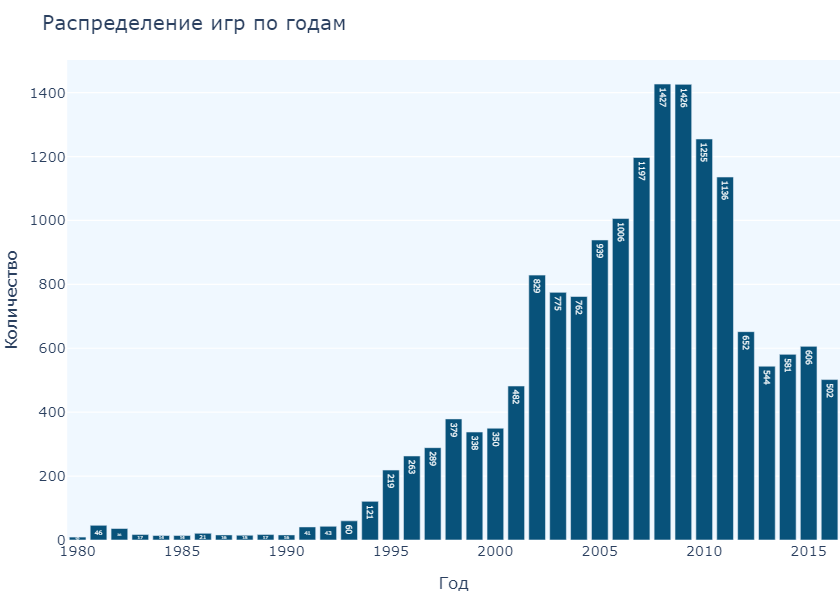

In [36]:
fig = px.bar(data.query('year_of_release > 0').groupby('year_of_release')['name']
             .count()
             .reset_index()
             .rename(columns={
                 'year_of_release': 'Год', 
                 'name': 'Количество'}), 
             y='Количество', 
             x='Год', 
             color_discrete_sequence=[colors[1]],
             title='Распределение игр по годам',        
             barmode='group',
             text='Количество')

fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(showlegend=False, legend_title='Группы',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})
fig.show()

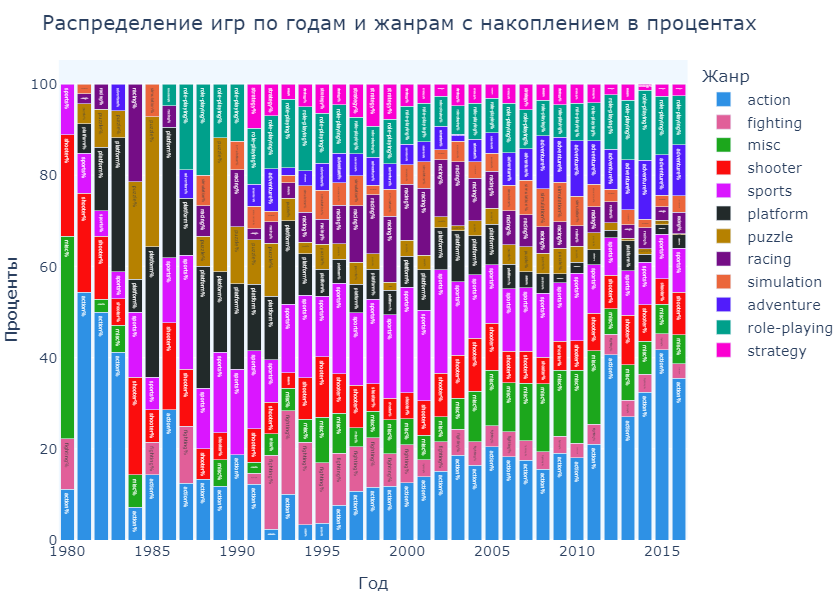

In [37]:
total_games_by_year(data)

Активный рост игрового рынка начался с ``1994 года``, это первый крупный __«скачок»__, так как количество игр __выросло в два раза__ в сравнении с предыдущим годом. 

В ``2005-2010`` годах наблюдается заметный __рост продаж игр на разнообразные платформы__. Если смотреть детальнее и по жанрам, то в этот период __нет резких изменений по смене популярности того или иного жанра__. Можно сказать, что это относительно спокойное, но в тоже время продуктивное время в производстве игр.

Подобное может быть обусловлено тем, что в период ``с 2005 по 2010 годы`` произошел запуск нескольких важных игровых платформ, таких как __Xbox 360, PlayStation 3 и Nintendo Wii__. Не будет лишним заметить, что приступив к выпуску игр на новые платформы геймдев компании __сильно не экспериментировали, а остановились на предпочтениях пользователей предыдущего периода__. 

В ``2011-2015 годах`` виден резкий __спад по выпуску игр__. 

Учитывая, что в этот период также были запуски известных платформ __PlayStation 4, Xbox One, Nintendo 3DS, PS Vita__, маловероятно, что это связано с потерей интереса пользователей к старым платформам и отстутствию достойной замены. 

Если и дальше предполагать о причинах спада, можно допустить, что игры нового поколения стали дороже и покупать их стало не так просто.  

Также платформы, выпущенные ``в 2005-2010 годах``, могли сохранять свою актуальность и влиять на продажи игр в течение последующих лет. В то время как ``в 2011-2015 годах`` индустрия может переживать переход к новым поколениям платформ, что часто сопровождается временным снижением продаж.

Также, примерно в это время активно развиваются мобильные устройства и __рынок мобильных игр растет очень активно__. Увы, в рамках этого исследования нет возможности сравнить эти два рынка, чтобы окончательно закрыть это предположение. В любом случае, после 2010 года, мобильные устройства становятся мощнее, инструменты для разработки игр — проще, условия размещения игр для продаже — более приемлемыми. 
Согласно исследованию [[1](#link1)], с анализом рынка компьютерных и мобильных игр, __мобильным играм__ на ``2014 год`` предсказывали __такую же прибыль, как и для компьютерных__, а затраты и срок разработки разнятся на миллионы долларов и годы. 

Также, возможно, с изменением времени и появлением новых технологий у потребителей изменились предпочтения, и спрос на видеоигры как развлекательный продукт мог снизиться.

<a id="num62"></a>
### Платформы

Соберем таблицу для дальнейшей работы. Учтем продажи по платформам, количество игр и год первой и последней игры. 

In [38]:
data_platform_releases = pd.pivot_table(data.query('year_of_release > 1986'), 
                                        values=['year_of_release', 'sum_sales'], 
                                        index='platform', 
                                        aggfunc={'year_of_release': ['min', 'max'], 'sum_sales':'sum'},
                                        fill_value='-').sort_values(by=('sum_sales', 'sum'), ascending=False)
data_platform_releases = data_platform_releases.reset_index()
data_platform_releases.columns = ['Платформа', 'Всего', 'Год окончания выпуска', 'Год начала выпуска']

data_platform_releases['Всего'] = data_platform_releases['Всего'].round(2)
data_platform_releases['Год начала выпуска'] = pd.to_datetime(data_platform_releases['Год начала выпуска'], format='%Y')
data_platform_releases['Год окончания выпуска'] = pd.to_datetime(data_platform_releases['Год окончания выпуска'], format='%Y')

Столбчатая диаграмма по количеству выпускаемых игр. 

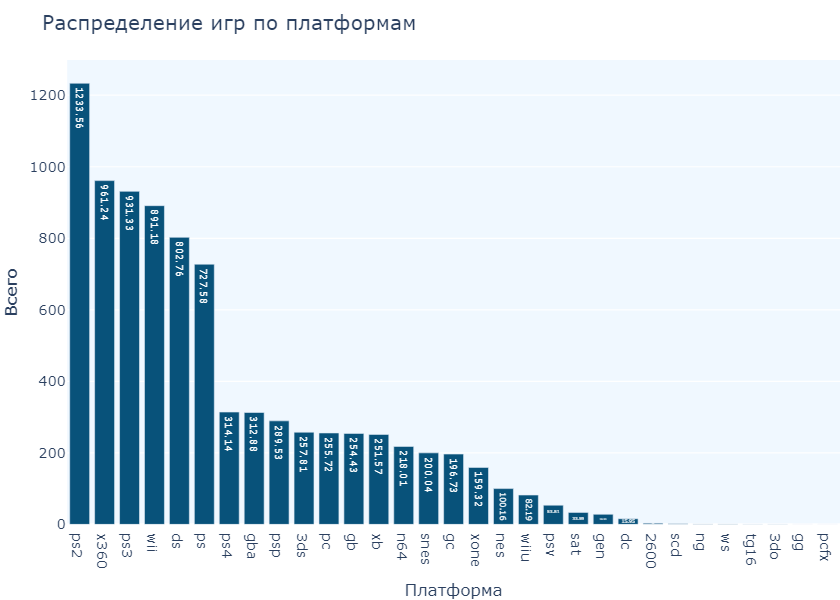

In [39]:
fig = px.bar(data_platform_releases,
             y='Всего', 
             x='Платформа', 
             color_discrete_sequence=[colors[1]],
             title='Распределение игр по платформам',        
             barmode='group',
             text='Всего'
            )

fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(showlegend=False, legend_title='Группы',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})
fig.show()

Посмотрим на распределение по продажам через диаграмму Санкея. 

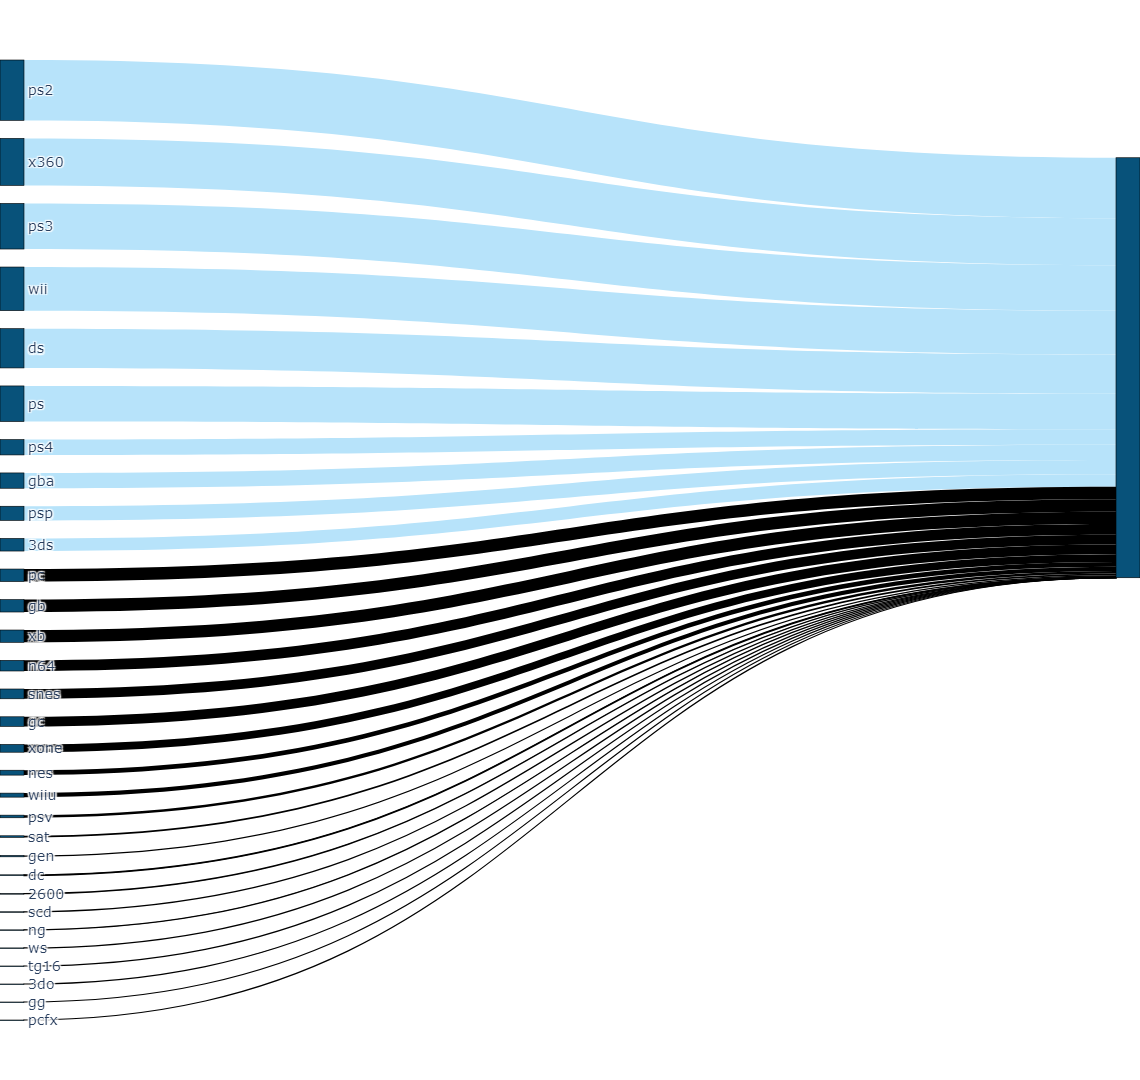

In [40]:
total_games = data_platform_releases["Всего"].sum()

platforms = data_platform_releases["Платформа"]
values = data_platform_releases["Всего"]

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=platforms,
        customdata=values,
        hovertemplate="Всего продаж",
        color=colors[1]
    ),
    link=dict(
        source=[i for i in range(len(platforms))],
        target=[len(platforms)] * len(platforms),
        value=values,
        color=[colors[8]] * 10
    )
)])

fig.update_layout(autosize=False, width=950,height=900,
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})
fig.show()

Посмотрим на распределение игр по платформам и по времени выпуска игр на эти же платформы.

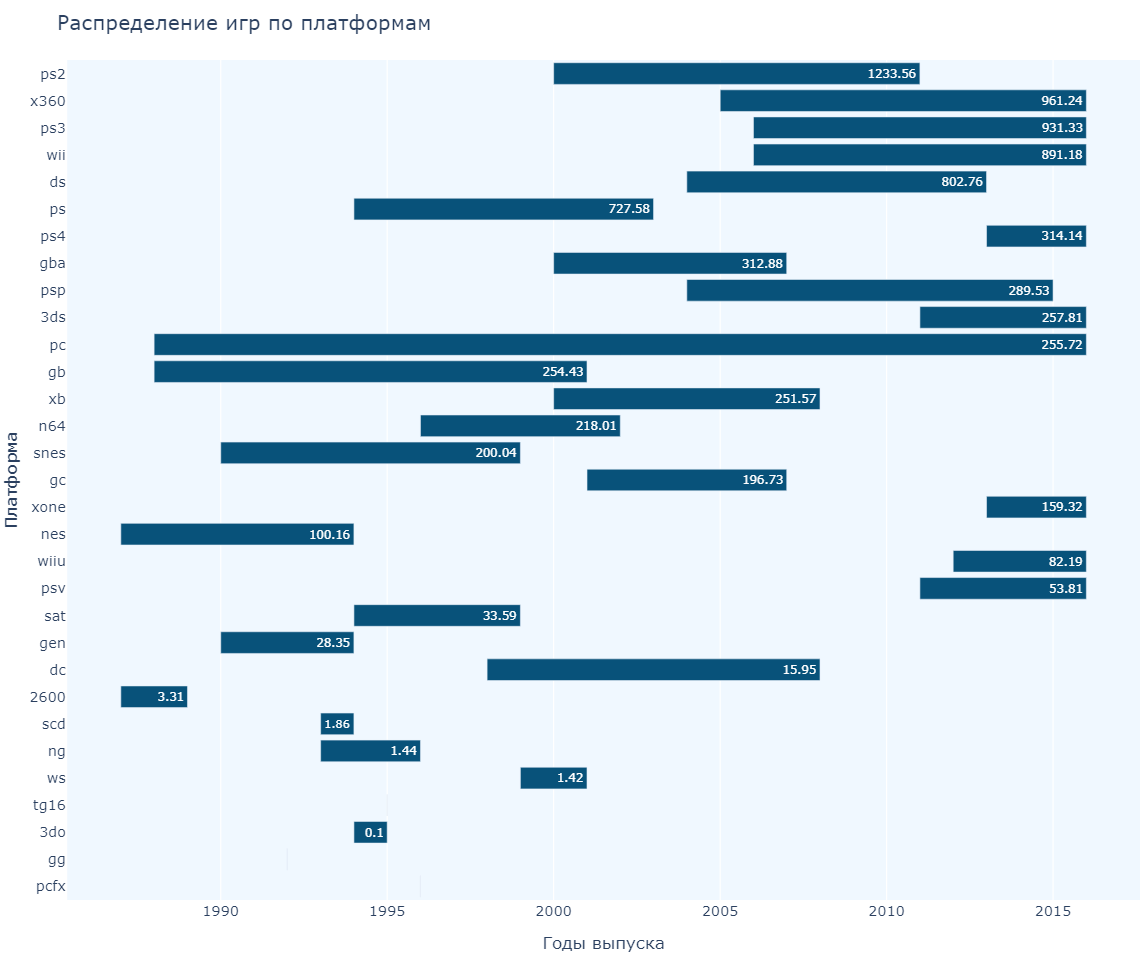

In [41]:
fig = px.timeline(data_platform_releases.sort_values(by='Всего', ascending=True),
                  x_start='Год начала выпуска', 
                  x_end='Год окончания выпуска', 
                  y='Платформа', 
                  color_discrete_sequence=[colors[1]],
                  text='Всего',
                  title='Распределение игр по платформам')

fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(autosize=False, width=950,height=800,
                  showlegend=False, legend_title='Группы',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50},
                  xaxis_title='Годы выпуска')
fig.show()

За все время топ-5 платформ это : 
1. ``PS2 (PlayStation 2) 2000г.``: суммарно ``1233.56`` продаж.
2. ``X360 (Xbox 360) 2005г.``: суммарно ``961.24`` продаж.
3. ``PS3 (PlayStation 3) 2006г.``:  суммарно ``931.33`` млн продаж.
4. ``Wii 2006г.``:  суммарно ``891.18`` млн продаж.
5. ``DS (Nintendo DS) 2004г.``:  суммарно ``802.78`` млн продаж.

Четыре из пяти платформ, которые попали в топ по продажам попали как раз на самый пиковый период продаж в целом ``2005-2010 годы``. 

<a id="num63"></a>
### Актуальный период 

Если исходить из задачи, что исследование ляжет в основу __планирования продаж__ на ``2017 год``, то оптимально будет взять промежуток ``с 2013 по 2015 года``, так как большинство старых платформ уже не актуально и в большей степени уже не поддерживаются по состоянию на 2011 год. 

``За 2016`` год данные лучше не брать, так как нет уверенности, что данные за этот год были заполнены полностью. Если смотреть на графики, то у всех платформ, даже у тех, которые активно росли в продажах, ``к 2016 году`` заметен __сильный спад__. 

Таким образом, берем данные только ``за 2013-2015 года``.

<a id="num64"></a>
### Потенциально прибыльные платформы

Посмотрим на 5 самых прибыльных платформ в период 2011-2015 годов. 

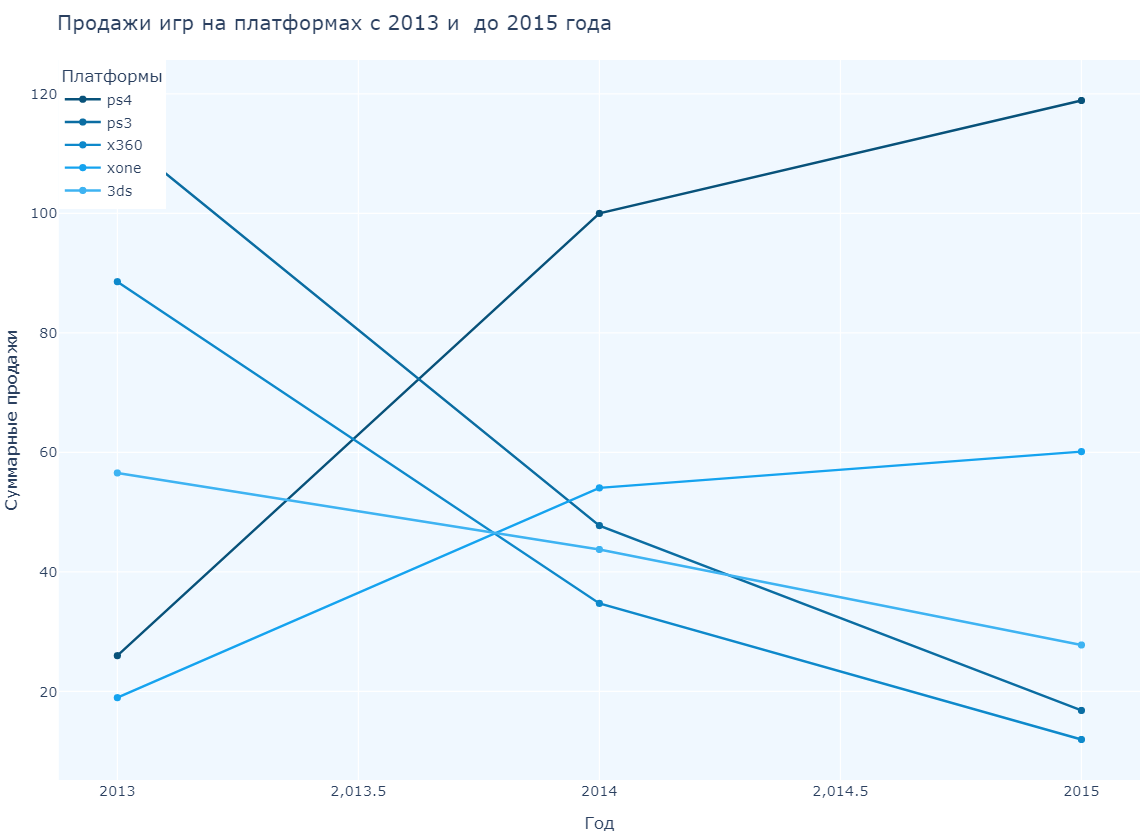

In [42]:
scatter_platform(data, 2013, 2015, 5)

Серии ``PlayStation и Xbox`` постепенно сменяют свои поколения. Из нового, что добавилось это ``Nintendo 3DS``. 

Если делать промежуточный прогноз, то: 
- В короткой перспективе стоит обратить внимание на новое поколение ``PS4`` и ``XOne``.  

- В длинной не стоит упускать из виду всю серию ``PlayStation и Xbox``, они постоянно обновляются и выпуск игр будет стабильно переходить с платформы на платформу.

- Выпуск игр на ``PC`` стабилен на протяжении многих лет и уровень родаж изменяется, но не в значительных масштабах.

<a id="num65"></a>
### Глобальные продажи

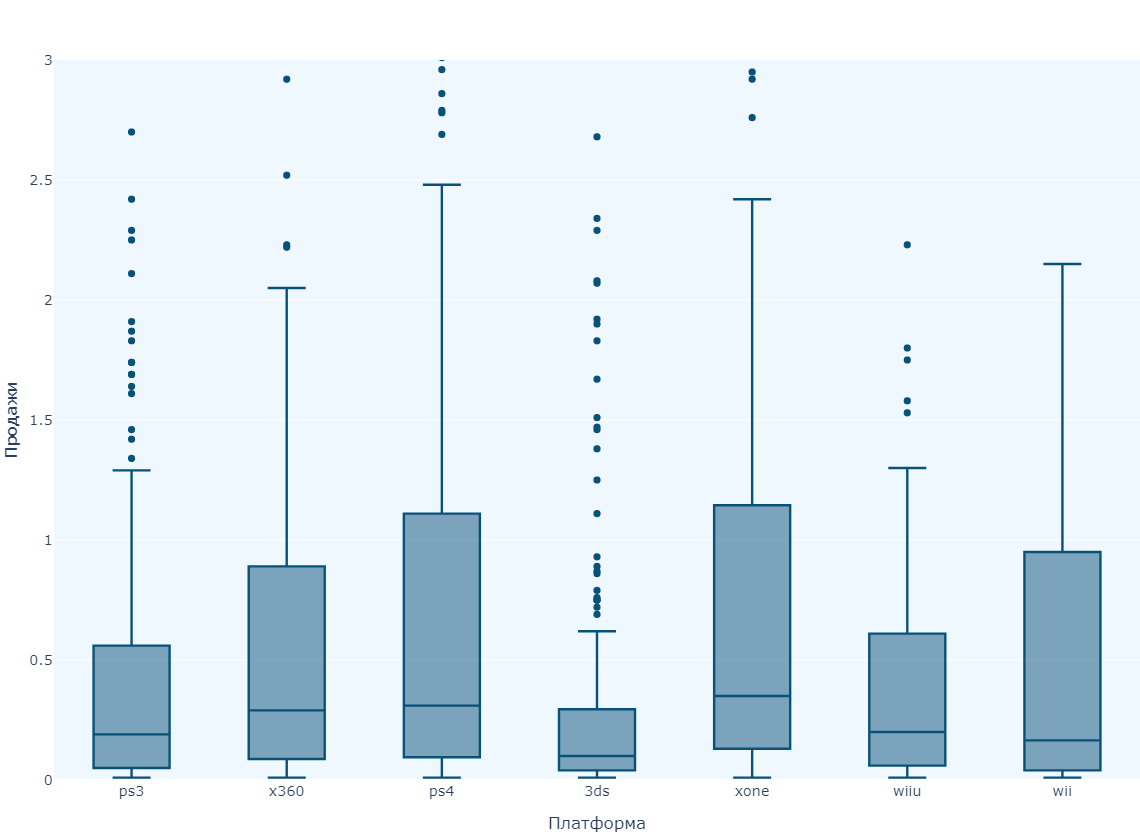

In [43]:
fig = px.box(data.query('year_of_release >= 2013 and year_of_release <= 2015').sort_values(by='sum_sales', ascending=False), 
             x='platform', 
             y='sum_sales',
             color_discrete_sequence=[colors[1]],
             labels={'platform': 'Платформа', 'sum_sales': 'Продано'})  

fig.update_layout(
    autosize=False, width=950, height=700,
    showlegend=False, legend_title='Группы',
    plot_bgcolor='AliceBlue',
    margin={"r": 0, "t": 50, "l": 0, "b": 50},
    xaxis=dict(title='Платформа', range=[-0.5, 6.5]), #
    yaxis=dict(title='Продажи', range=[0, 3]))
    
fig.show()

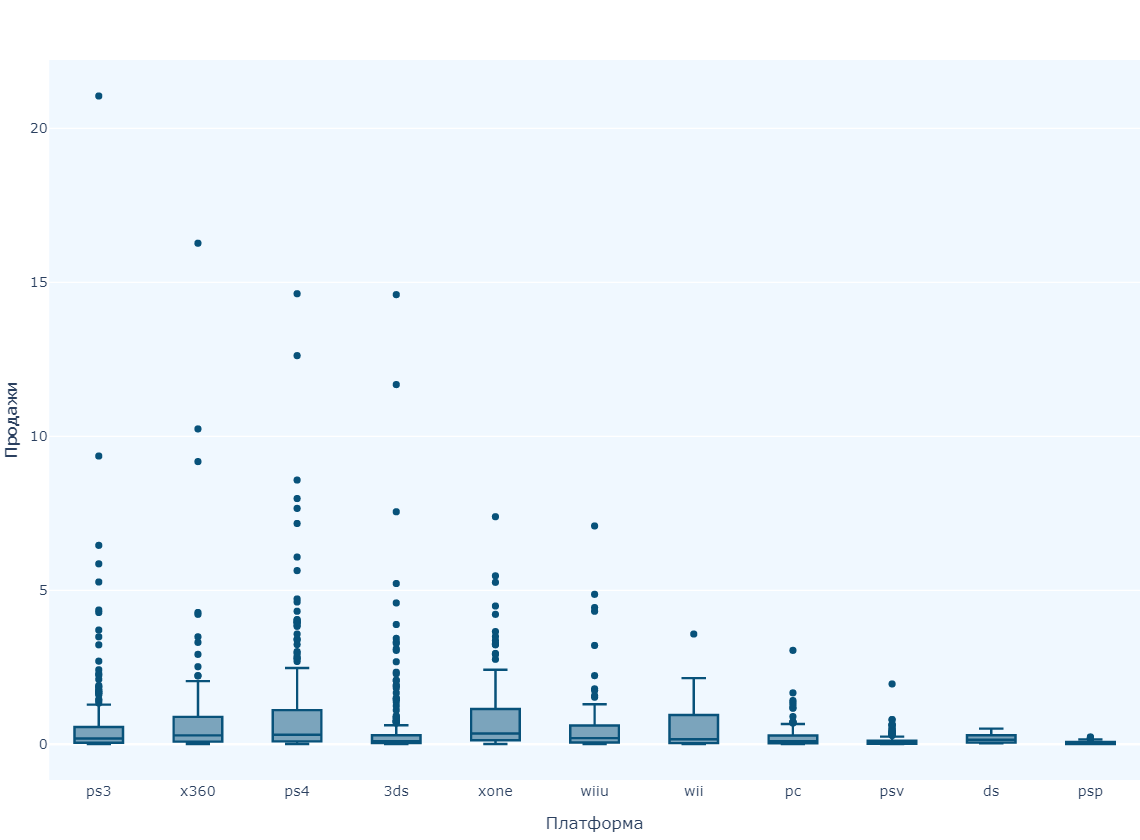

In [44]:
fig = px.box(data.query('year_of_release >= 2013 and year_of_release <= 2015').sort_values(by='sum_sales', ascending=False), 
             x='platform', 
             y='sum_sales',
             color_discrete_sequence=[colors[1]],
             labels={'platform': 'Платформа', 'sum_sales': 'Продано'})  

fig.update_layout(
    autosize=False, width=950, height=700,
    showlegend=False, legend_title='Группы',
    plot_bgcolor='AliceBlue',
    margin={"r": 0, "t": 50, "l": 0, "b": 50},
    xaxis=dict(title='Платформа'), #
    yaxis=dict(title='Продажи'))
    
fig.show()

Проведем анализ продаж по глобальным продажам игр в разбивке по платформам в рамках обсуждаемого периода ``2011-2015 год``. 

Платформа ``PS3 и x360``:
Две соперничающие платформы показыват не совсем одинаковые, но близкие результаты, но с небольшим перевесом преобладают продажи на ``х360``. Медианное значение ``PS3`` ``0.19`` против ``0.29`` у ``x360``. Также у ``x360`` верхний ус выше, что может свидетельствовать о более удачных играх. 

В следующем поколении ``PS4 и Xbox One`` также имеют примерно одинаковые показатели, но, тем не менее продажи на ``Xbox One`` не попали в топ-5. 

Платформы ``3DS и Wii`` имеют схожие результаты, с некоторым первенством платформы ``Wii``.  

У всех платформ есть выбросы, которые свидетельствуют о необычных событиях, вероятнее всего, об успешных играх на данных платформах. Так, у ``PS3`` есть выбросы с суммой продаж в ``21.5``, это была игра ``«Grand Theft Auto V»`` с шикарным успехом, следующая в списке самых кассовых игр она же, но уже на платформу ``х360``.  

<a id="num66"></a>
### Влияние отзывов на продажи 

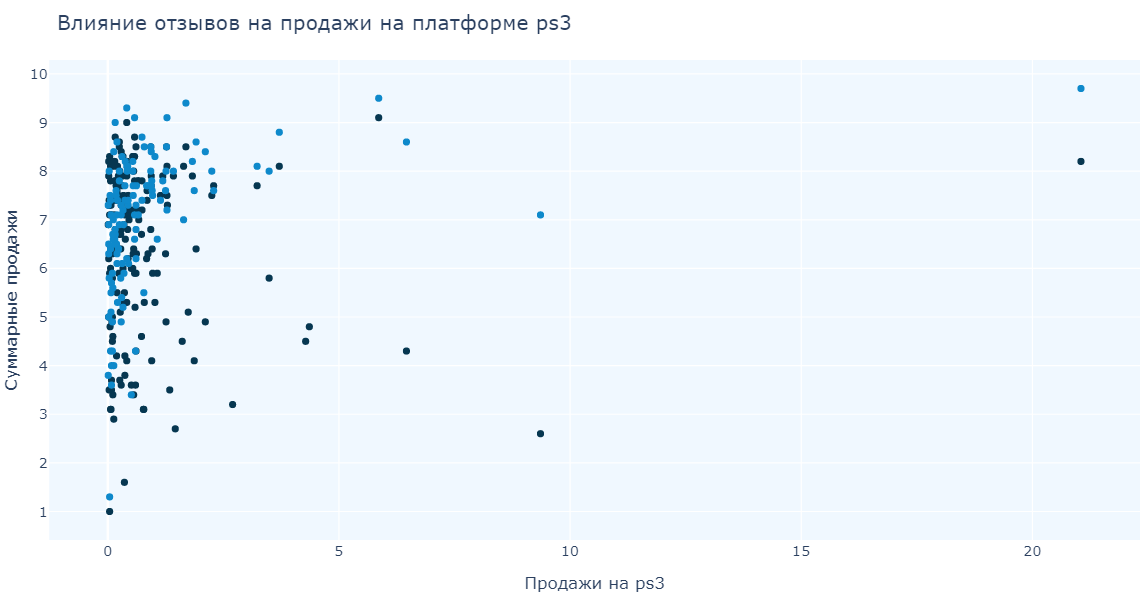

'Корреляция отзывов пользователей и продаж для ps3: -0.016'

'Корреляция отзывов критиков и продаж ps3: 0.334'

In [45]:
for _ in (data.query('year_of_release >= 2013 and year_of_release <= 2015')
          .sort_values(by='sum_sales', ascending=False)['platform']
          .head(1)):
    corr_platform(data.query('year_of_release >= 2013 and year_of_release <= 2015'), _)

Корреляция отзывов пользователей и продаж для ``PS3``: ``-0.016`` означает, что некоторая ~~отрицательная~~ взаимосвязь между отзывами пользователей о играх для ``PlayStation 3`` и объемом их продаж, есть, но она крайне мала. 

Корреляция отзывов критиков и продаж ``PS3``: ``0.334`` указывает на более сильную ~~положительную~~ взаимосвязь между отзывами критиков о играх для ``PlayStation 3`` и их продажами. Значение ``0.334`` говорит о том, что эта связь также не является крайне сильной, но она сильнее, чем в случае с отзывами пользователей.

Таким образом, можно предположить, что игры с более высокими оценками критиков склонны к более высоким продажам, чем игры с более высокими оценками пользователей на ``PlayStation 3``, но это различие очень мало и, вероятнее всего, не стоит его брать во внимание. 

<a id="num67"></a>
### Соотнесите выводы с продажами игр на других платформах.

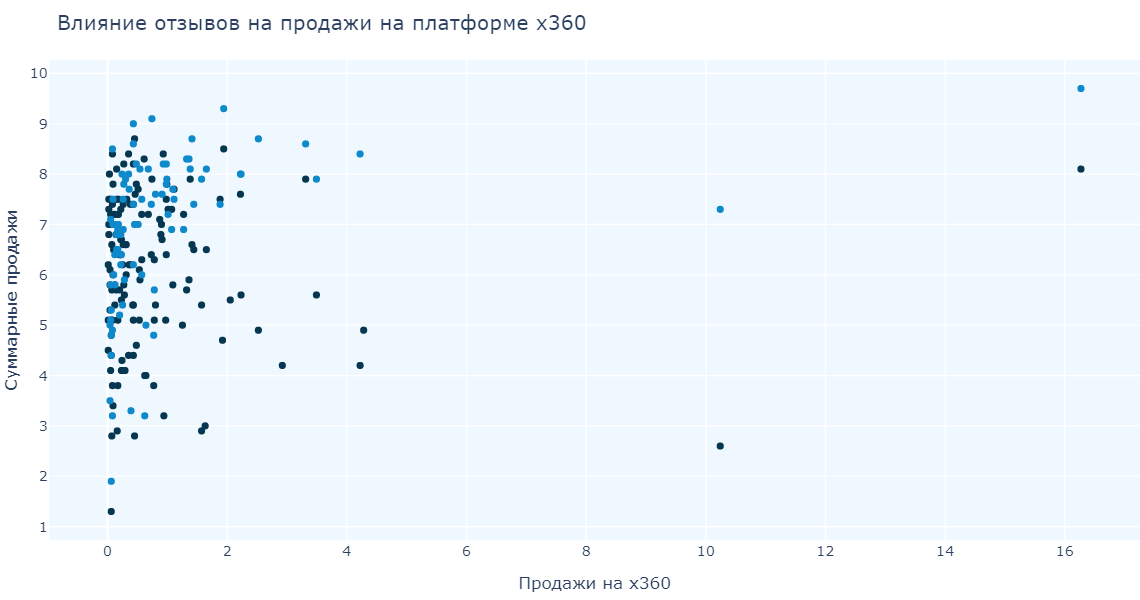

'Корреляция отзывов пользователей и продаж для x360: -0.035'

'Корреляция отзывов критиков и продаж x360: 0.35'

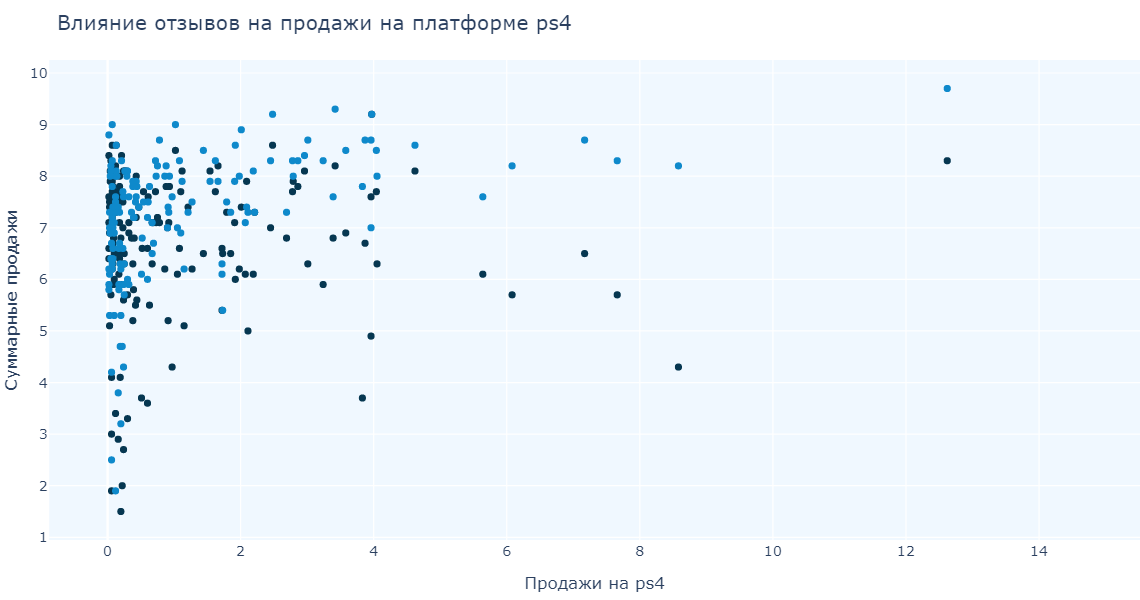

'Корреляция отзывов пользователей и продаж для ps4: 0.024'

'Корреляция отзывов критиков и продаж ps4: 0.432'

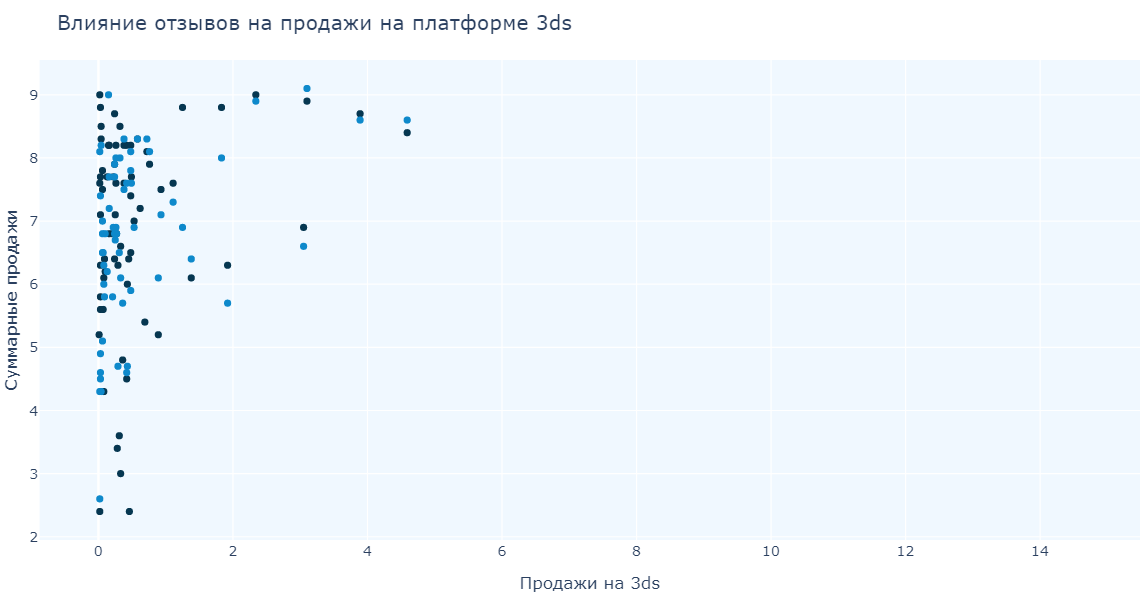

'Корреляция отзывов пользователей и продаж для 3ds: 0.265'

'Корреляция отзывов критиков и продаж 3ds: 0.384'

In [46]:
for _ in list(data.query('year_of_release >= 2013 and year_of_release <= 2015')
                         .sort_values(by='sum_sales', ascending=False)['platform']
                         .head(4))[1:5]:
    corr_platform(data.query('year_of_release >= 2013 and year_of_release <= 2015'), _)

При сравнении продаж по остальным четырем платформам из списка топ-5, ситуация остается такой же как и при сравнении по ``PS3`` — отзывы критиков и продажи коррелируют больше чем отзывы пользователей и продажи. Но значения все равно довольно малы и корреляция в этом случае крайне слаба. 

При сравнении продаж по остальным четырем платформам можно обнаружить совершенно разные результаты.
- Так для ``x360`` ситуация схожа с ``PS3``, крайне маленькое значение отрицательной корреляции между отзывами пользователей и продажами, и не очень сильная положительная корреляция между отзывами критиков и продажами. 
- Для ``PS4``, ситуация немного иная:  
    - практически отсутствует корреляция между отзывами пользователей и продажами;
    - есть заметная корреляция межд отзывами критиков и продажами.
- Для ``3DS``: 
    - положительная корреляция отзывов пользователей и критиков заметна, но она также не очень сильна. 


<a id="num68"></a>
### Жанры

Подготовим сводные таблицы по регионам и общую.

In [47]:
data_all = pd.pivot_table(data.query('year_of_release >= 2011 and year_of_release <= 2015'), 
                          values=['sum_sales', 'critic_score', 'user_score', 'name'], 
                          index=['platform', 'genre'], 
                          aggfunc={'sum_sales':'sum', 'name':'count', 'critic_score':'median', 'user_score':'median'},
                          fill_value='-').sort_values(by=('sum_sales'), ascending=False).reset_index()
data_all.columns = ['Платформа', 'Жанр', 'Оценка критиков', 'Количество игр', 'Сумма продаж', 'Оценка пользователей']
data_all['Оценка критиков'] = pd.to_numeric(data_all['Оценка критиков'], errors='coerce')
data_all['Оценка критиков(1-10)'] = (data_all['Оценка критиков'] / 10).round(2)

data['na_sales'] = pd.to_numeric(data['na_sales'], errors='coerce')
data['eu_sales'] = pd.to_numeric(data['eu_sales'], errors='coerce')
data['jp_sales'] = pd.to_numeric(data['jp_sales'], errors='coerce')
data['other_sales'] = pd.to_numeric(data['other_sales'], errors='coerce')

data_na = process_pivot_table(data.query('year_of_release >= 2013 and year_of_release <= 2015'), 'na_sales')
data_eu = process_pivot_table(data.query('year_of_release >= 2013 and year_of_release <= 2015'), 'eu_sales')
data_jp = process_pivot_table(data.query('year_of_release >= 2013 and year_of_release <= 2015'), 'jp_sales')
data_other = process_pivot_table(data.query('year_of_release >= 2013 and year_of_release <= 2015'), 'other_sales')

Также добавлен был столбец ``«Оценка критиков(1-10)»`` — это оценка критиков, но она была выражена через 10-бальная систему. 

Далее рассмотрим популярность жанров в зависимости от того или иного показателя. 

Сравним следующее: 
- Жанр и Оценка критиков(1-10),
- Жанр и Оценка пользователей ,
- Жанр и Количество игр,
- Жанр и Сумма продаж. 

<a id="num681"></a>
#### Жанр и Оценка критиков(1-10)

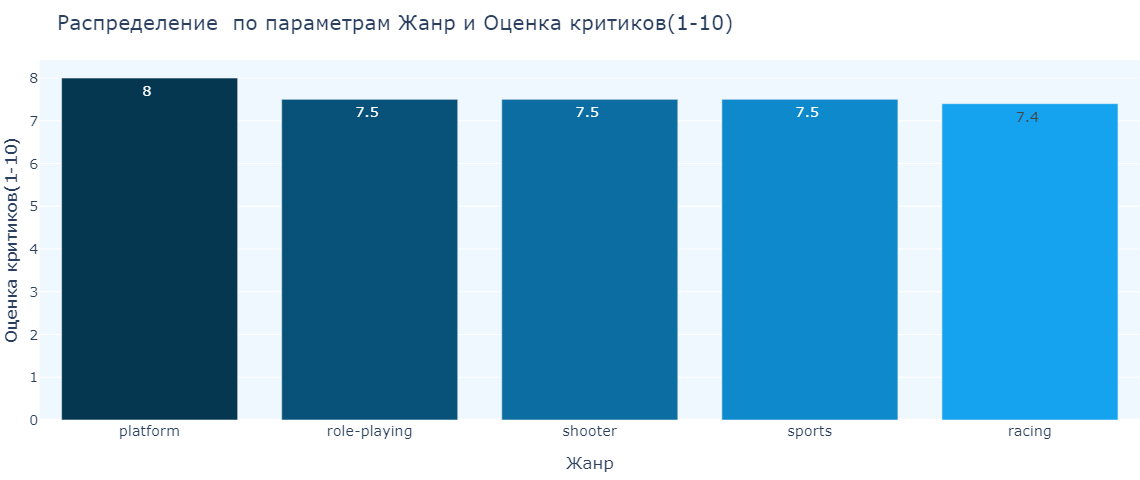

In [48]:
top_platform_all(data_all, 
                 param_x='Жанр', 
                 param_y='Оценка критиков(1-10)', 
                 agg='median', 
                 top=5)

Судя по оценкам критиков, самые высокие баллы получали игры в жанре ``platform`` — ``8``.

Дальше жанры расположились в следующем порядке: 
- ``shooter``, ``role-playing``, ``sports`` — оценка ``7.5``,
- ``racing`` — оценка ``7.4``.

<a id="num682"></a>
#### Жанр и Оценка пользователей

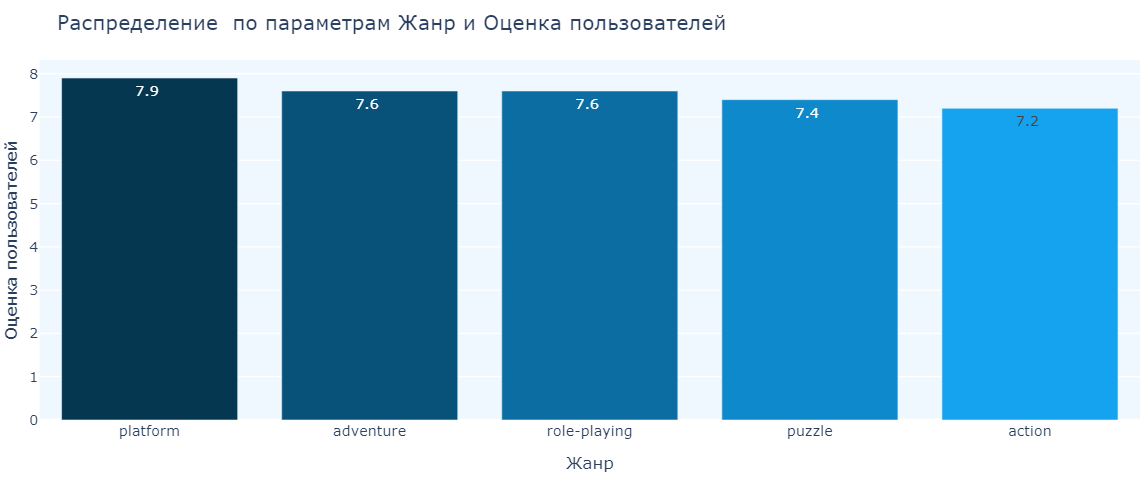

In [49]:
top_platform_all(data_all, 
                 param_x='Жанр', 
                 param_y='Оценка пользователей', 
                 agg='median', 
                 top=5)

Пользователи высоко оценивают игры, но оценки все равно ниже чем оценки критиков. 

В топ-5 по оценкам пользователей и топ-5 по оценкам критиков, жанры ``platform``, ``role-playing`` повторяются, вот только пользователи оценивают игры из этих жанров несколько ниже. 

Также пользователи не сошлись во вкусах с критиками, так как для пользвателей игры из жанра ``action``, ``adventure`` и ``puzzle`` более привлекательны, чем ``sports`` и ``racing``. 

<a id="num683"></a>
#### Жанр и Количество игр

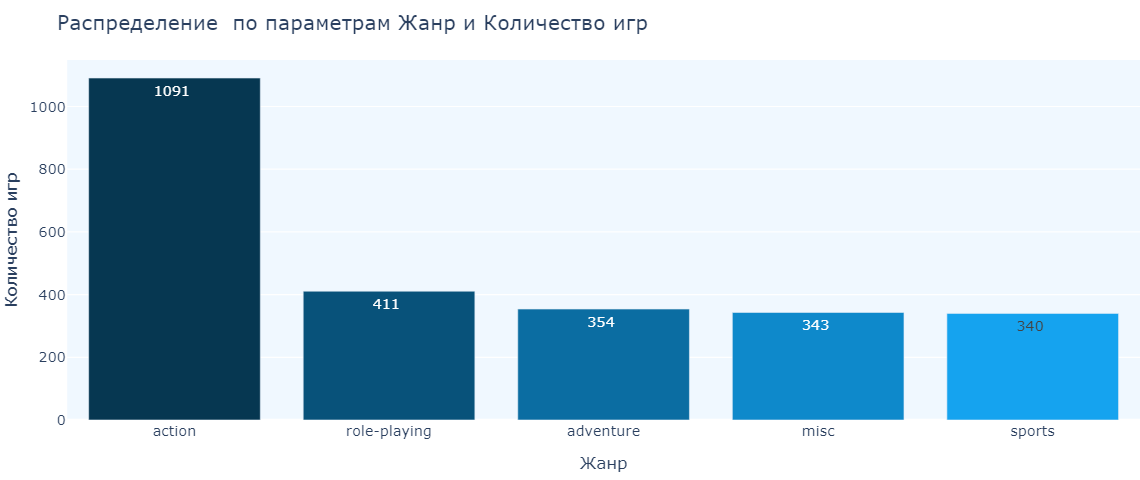

In [50]:
top_platform_all(data_all, 
                 param_x='Жанр', 
                 param_y='Количество игр', 
                 agg='sum', 
                 top=5)

С большим отрывом в жанре ``action`` было создано более ``1000 игр``. Ближайший жанр по количеству игр — ``role-playing`` — ``411 игр``. 

Также в топ-5 входят жанры: 
- ``adventure`` — 354 игры,
- ``misc`` — 343 игры,
- ``sports`` — 340 игр.

<a id="num684"></a>
#### Жанр и Сумма продаж

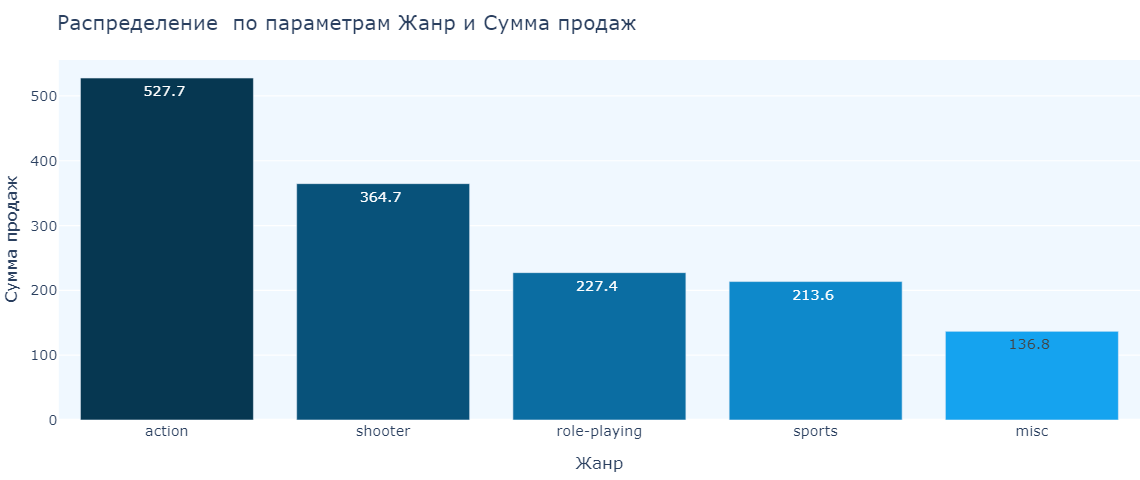

In [51]:
top_platform_all(data_all, 
                 param_x='Жанр', 
                 param_y='Сумма продаж', 
                 agg='sum', 
                 top=5)

Больше всего за продажи выручили игры из жанра ``action``, что не удивительно при наибольшем количестве выпущенных игр. 

В топ-5 по сумме продаж также попали жанры: 
- ``shooter`` — ``364.7``,
- ``role-playing`` — ``227.4``,
- ``sports`` — ``213.6``,
- ``misc`` — ``136.8 ``.

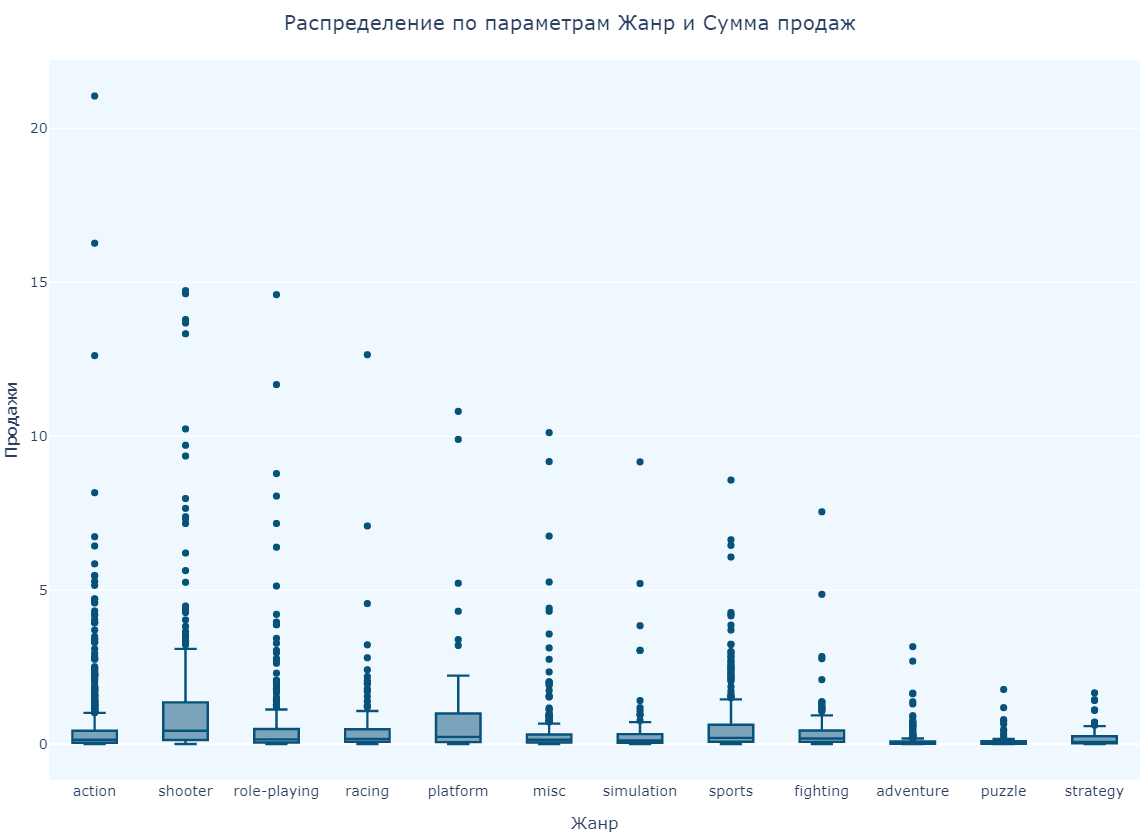

In [52]:
fig = px.box(data.query('year_of_release >= 2011 and year_of_release <= 2015').sort_values(by='sum_sales', ascending=False), 
             x='genre', 
             y='sum_sales',
             color_discrete_sequence=[colors[1]])  

fig.update_layout(
    autosize=False, width=950, height=700,
    showlegend=False, legend_title='Группы',
    plot_bgcolor='AliceBlue',
    margin={"r": 0, "t": 50, "l": 0, "b": 50},
    title='Распределение по параметрам Жанр и Сумма продаж',
    title_x = 0.5,
    xaxis=dict(title='Жанр'),
    yaxis=dict(title='Продажи'))
    
fig.show()

<a id="num685"></a>
#### Выводы

На основе проведенного анализа жанров видеоигр, можно сделать следующие выводы. 

Игры в жанре ``shooter`` получают самые высокие оценки критиков среди рассмотренных жанров, в то время как пользователи более высоко оценивают игры в жанре ``puzzle``. 

Несмотря на различия в предпочтениях, жанры ``platform``, ``role-playing`` и ``shooter`` входят в топ-5 как по оценкам критиков, так и по оценкам пользователей.

Отмечается также различие между восприятием критиками и пользователями, особенно в отношении жанра ``action``, который пользователи находят более привлекательным, чем ``sports`` и ``racing``, в то время как критики не ставят ему самые высокие оценки. 

По количеству выпущенных игр и общим продажам лидирующими жанрами являются ``action`` и ``shooter``, что свидетельствует о их популярности и коммерческом успехе. 

<a id="num69"></a>
### Портрет пользователя по регионам

<a id="num691"></a>
#### Самые популярные платформы у пользователей всего мира

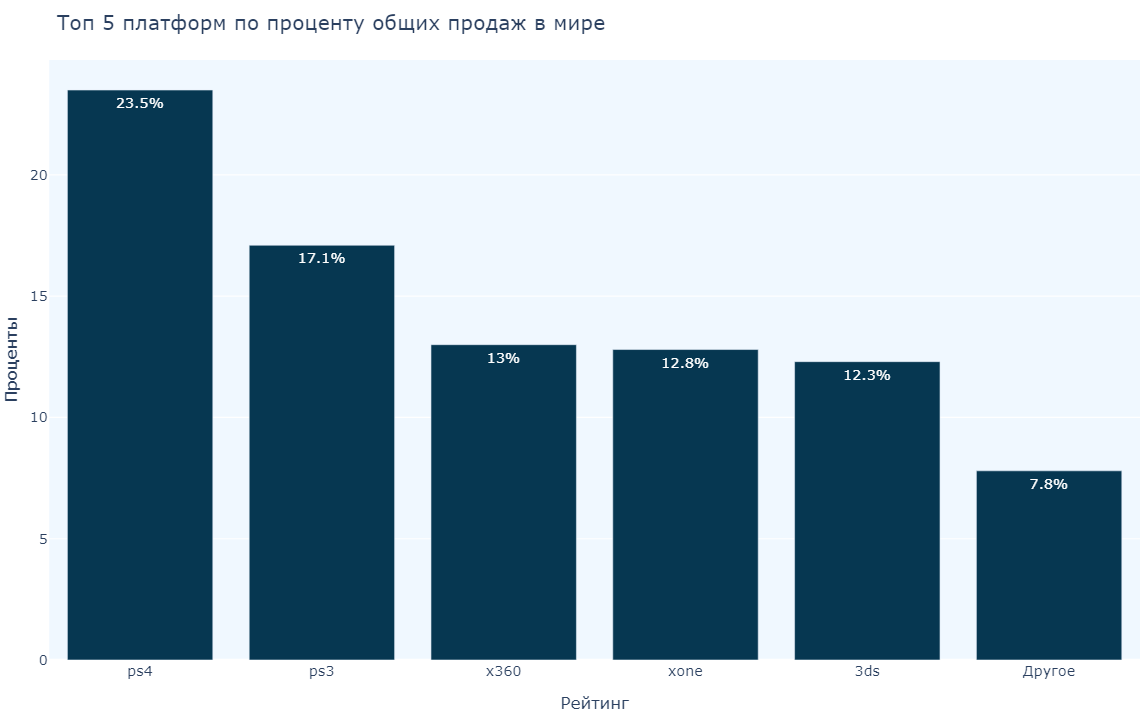

In [53]:
top_platform_region_bar(data.query('year_of_release >= 2013 and year_of_release <= 2015'), 
                        region='world', 
                        param='platform', 
                        top=6)

Первое место по популярности занимает платформа ``PS4``, в наблюдаемом периоде ``23.5%`` было именно за этой платформой. 

Дальше платформы расположились в следующем порядке в топ-5, без учета совокупности продаж на платформы вне топ-5: 
2. ``PS3`` c ``17.1%``. 
3. Третье место занимает ``x360`` — ``13%``. 
4. Новое поколение ``Xbox`` — ``Xbox One`` — ``12.8%``. 
5. ``3DS`` — ``12.3%``.

Также, категория других платформ, которые не попали в список, занимает — ``7.8%`` от всех. 

<a id="num692"></a>
#### Популярные платформы по продажам(%) у пользователей регионов:  NA, EU, JP и остальные.

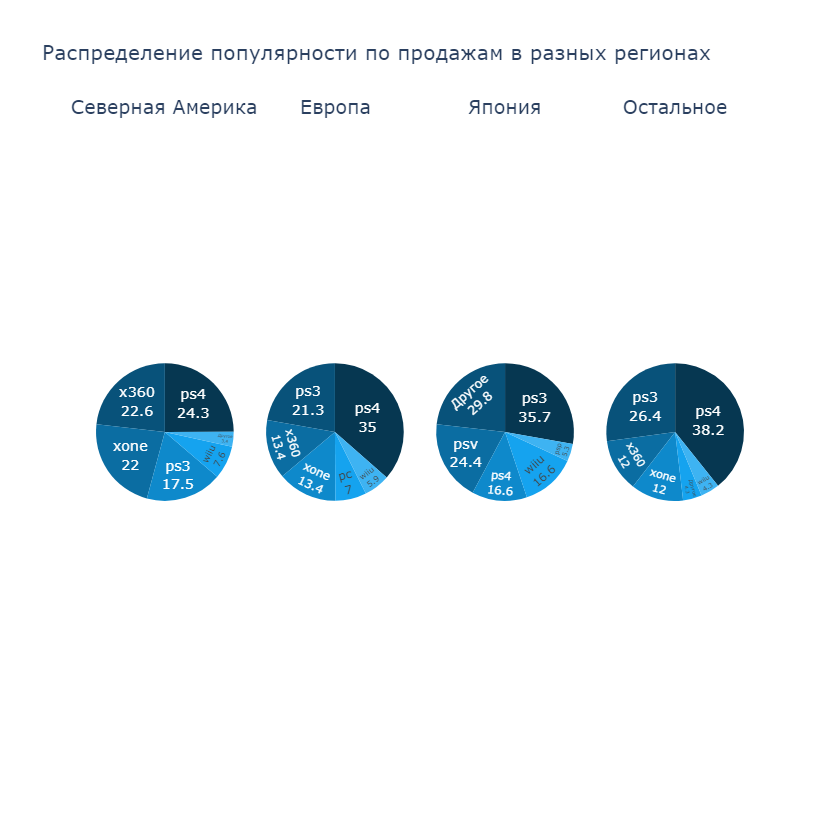

In [54]:
top_platform_region_pie(data.query('year_of_release >= 2013 and year_of_release <= 2015'), 
                        region='region',  
                        param='platform',
                        top=6)

Во всех регионах, кроме Японии ``PS4`` занимает первое место: 
- ``в Северной Америке`` — ``24.3%``,
- ``в Европе`` — ``35%``,
- ``в остальном мире`` — ``38.2%``.
В ``В Японии`` первой по популярности является ``PS3`` — ``35.7%``. 

Регионы ``Северной Америки`` и ``Европы`` в целом очень схожи, в топ-5 совпадают 4 из 5 платформ:

| |Северная Америка  | Европа          |
|-|------------------|-----------------|
|1|PS4              | PS4             |
|2|x360               | PS3            |
|3|XOne               | x360             |
|4|PS3              | XOne|
|5|<div style="background-color: #c79da4; color: #000; font-size: 14px; padding: 1px; margin: 1px; border: solid 1px #ccc; width: 98%; height: 98%"> WiiU     </div>               | <div style="background-color: #c79da4; color: #000; font-size: 12px; padding: 1px; margin: 1px; border: solid 1px #ccc; width: 98%; height: 98%"> PC  </div> |

Отличаются только по ``PC`` и ``WiiU``.

Япония же кардинально отличается. Из совпадающих платформ с регионами Европы и Северной Америки только ``PS3, PS4 и WiiU``, остальное это приставки, которые попали в топ-5. 
Стоит обратить внимание, что в Японии очень большой процент приходится на категорию платформ, которые не вошли в топ-5 — ``29.8%``. 
Япония имеет уникальную игровую культуру, и в ней популярны преимущественно местные или азиатские платформы, такие как серия от Nintendo, которые позволяют игрокам играть в любом месте. Также многие эксклюзивные игры выходят только на портативные платформы, чем поддерживают интерес к ним. 

<a id="num693"></a>
#### Популярные жанры у пользователей регионов:  NA, EU, JP и остальные.

Посмотрим на предпочтения по жанрам у пользователей из разных регионов.

<a id="num6931"></a>
##### Самые популярные жанры у пользователей всего мира

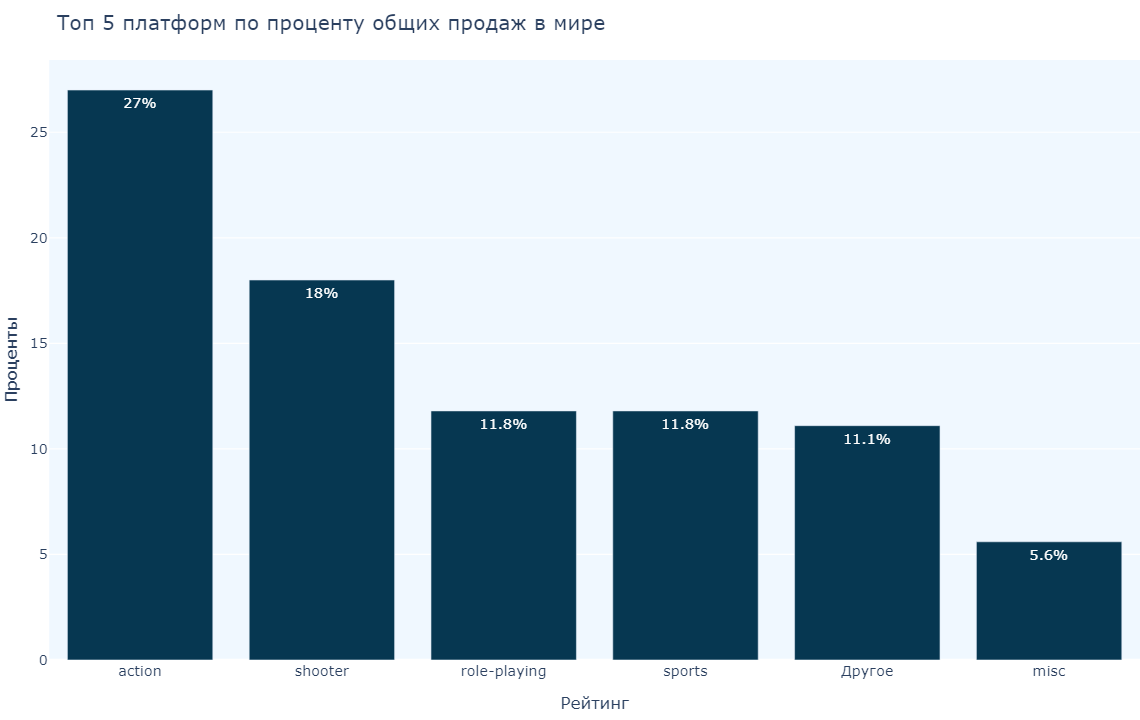

In [55]:
top_platform_region_bar(data.query('year_of_release >= 2013 and year_of_release <= 2015'), 
                        region='world', 
                        param='genre', 
                        top=6)

В мире жанры распределены следующим образом: 
- ``action`` — ``27%``,
- ``shooters`` — ``18%``,
- ``role-playing`` — ``11.8%``, 
- ``sports`` — ``11.8%``,
- ``misc`` — ``5.6%``.

##### Жанры по сумме продаж в регионах

Посмотрим на предпочтение по жанрам в регионах. 

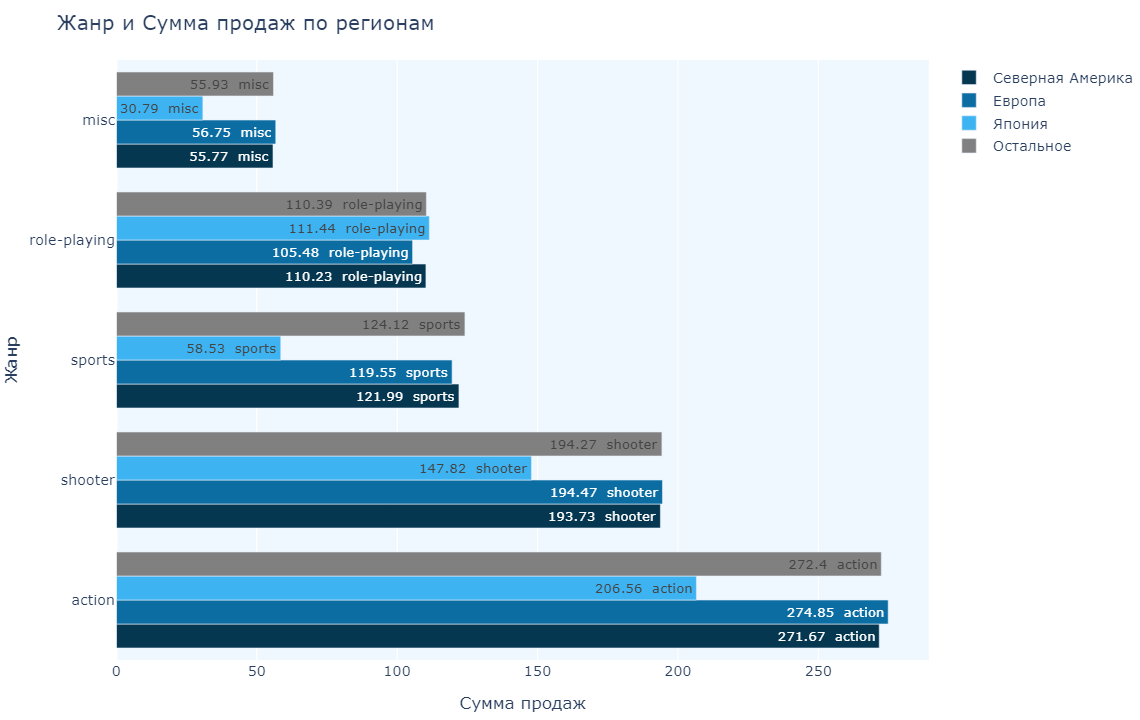

In [56]:
region_user_data(data_na, 
                 data_eu, 
                 data_jp, 
                 data_other, 
                 param_x='Жанр', 
                 param_y='Сумма продаж', 
                 top=5)

Все жанры из топ-5 успешно продаются в различных регионах. 

<a id="num6933"></a>
##### Жанры по количеству игр в регионах

Посмотрим на зависимость между жанром и количеством проданных игр на эту платформу в каждом из регионов. 

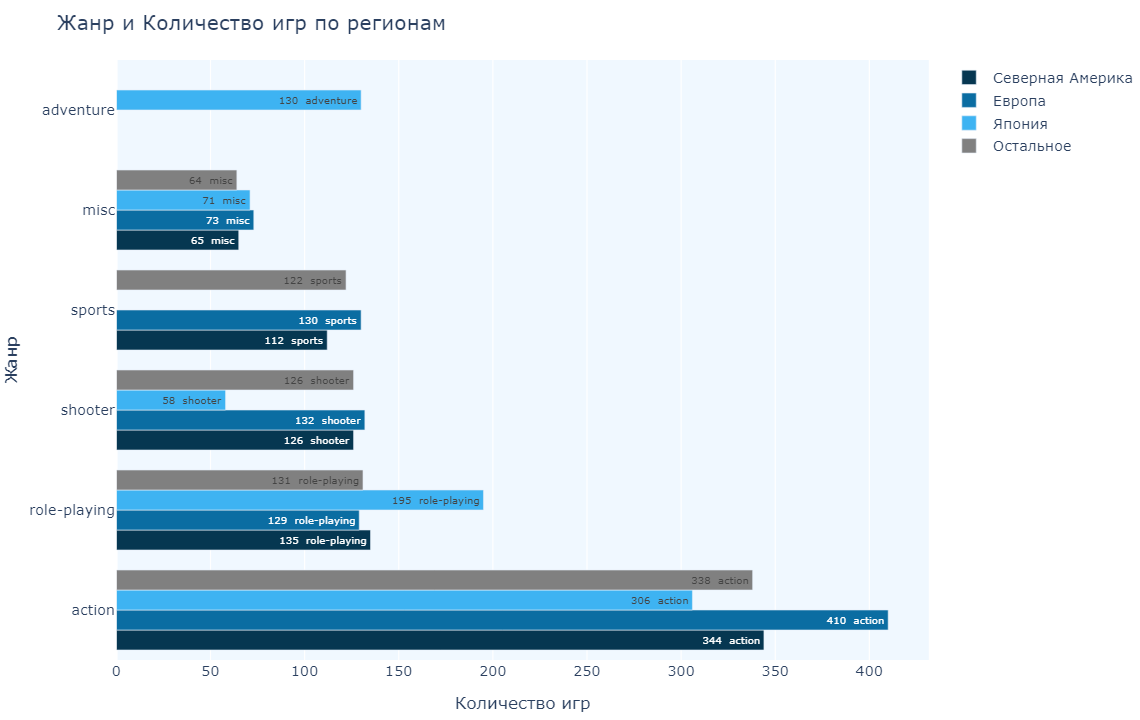

In [57]:
region_user_data(data_na, 
                 data_eu, 
                 data_jp, 
                 data_other, 
                 param_x='Жанр', 
                 param_y='Количество игр', 
                 top=5)

В каждом из регионов все жанры: ``action``, ``role-playing``, ``shooters``, ``sports``, ``misc``,  входят в топ-5, кроме Японии. В Японии есть одно отличие, игры в жанре ``sports`` не входят в топ-5, а вот ``adventure`` — входят. 

<a id="num694"></a>
#### Выводы

По итогам исследования портреты пользователей выглядят следующим образом: 

1. **Северная Америка:**
   - **Платформы:** Лидерство в предпочтениях пользователей принадлежит платформе ``x360``, составляя ``32%`` общих продаж.
   - **Жанры:** Предпочтения в жанрах схожи с мировыми тенденциями, где action, shooters, role-playing, sports и misc входят в топ-5.

2. **Европа:**
   - **Платформы:** ``PS3`` пользуется наивысшей популярностью, составляя ``28.9%`` общих продаж. Европейские предпочтения в топ-5 платформ схожи с Северной Америкой, за исключением ``PC и Wii``.
   - **Жанры:** Жанровые предпочтения в топ-5 аналогичны мировым тенденциям, включая ``action, shooters, role-playing, sports и misc``.

3. **Япония:**
   - **Платформы:** Уникальная игровая культура Японии проявляется в высоком проценте продаж платформ, не входящих в топ-5 (47%). ``PS3 и PS4`` попадают в топ-5, но остальные платформы — нет.
   - **Жанры:** Отличие в жанровых предпочтениях, где ``misc`` не входят в топ-5, а ``platform и adventure`` заменяют их, соответственно.

4. **Остальной мир:**
   - **Платформы:** ``PS3`` занимает первое место, а общие предпочтения схожи с мировыми тенденциями.
   - **Жанры:** Жанровые предпочтения также совпадают с общемировыми тенденциями, включая ``action, shooters, role-playing, sports и misc``.

<a id="num610"></a>
### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Разберем рейтинги подробнее. 

В данных представлено 8 уникальных рейтингов: 

- ``E (Everyone)`` — «Для всех»: Игра подходит для всех возрастов. Возможны минимальные насилие и анимированная кровь.
- ``M (Mature)`` — «Для взрослых»: Игра подходит только для взрослых. Может содержать интенсивное насилие, кровь, сексуальный контент и/или крепкий нецензурный язык.
- ``T (Teen)`` — «Подросткам»: Игра подходит для подростков. Возможно наличие крови, легкого насилия, намеков на сексуальность и/или ненавязчивого грубого языка.
- ``E10+ (Everyone 10 and older)`` — «Для всех от 10 лет и старше»: Игра подходит для всех, старше 10 лет. Может содержать немного более интенсивное насилие, легкий терминологический юмор или намеки на сексуальность.
- ``K-A (Kids to Adults)`` — «Для детей и взрослых»: Игра подходит для всех. Этот рейтинг был использован ранее, но сейчас его заменил рейтинг "E".
- ``AO (Adults Only)`` — «Только для взрослых»: Игра предназначена только для взрослых. Возможен интенсивный сексуальный контент или сексуальный контент с несколькими участниками.
- ``EC (Early Childhood)`` — «Для детей младшего возраста»: Игра предназначена для детей младшего возраста. Содержание подходит для детей до 3 лет и включает образовательные элементы.
- ``RP (Rating Pending)`` — «Оценка ожидается»: Игра была представлена на рассмотрение ESRB, но пока еще не получила окончательной оценки.

Также встречается ``not_rated`` — «Не оценено»: Игра не была оценена ESRB или другой аналогичной организацией и пустые значения были заполнены мною ранее этим термином.  

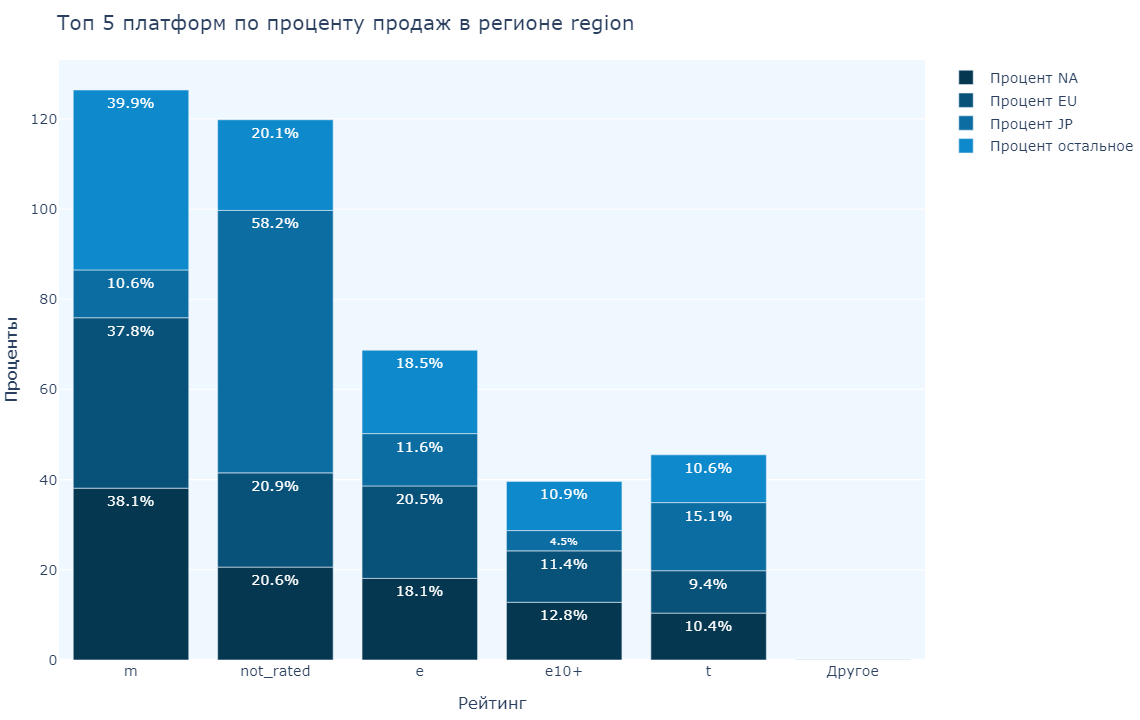

In [58]:
top_platform_region_bar(data.query('year_of_release >= 2013 and year_of_release <= 2015'), 
                        region='region', 
                        param='rating', 
                        top=6)

Да, рейтинг ``ESRB`` может влиять на продажи игр в различных регионах. Из предоставленных данных видно, что игры для взрослых (рейтинг «M») чаще всего встречаются в рейтингах, и при этом ``Северная Америка и Европа`` приобретают их почти равнозначно, составляя ``38.1% и 37.8%`` от общих продаж соответственно. В то время как ``Япония`` приобретает всего лишь ``10.6%`` от общих продаж игр для взрослых.

Также интересно, что ``Северная Америка и Европа`` имеют примерно одинаковые проценты по всем рейтингам и опережают ``Японию`` в каждом из них, за исключением игр для подростков («T»), где ``Япония`` опережает остальные регионы. Возможно, это связано с предпочтениями и культурными особенностями каждого региона, которые могут влиять на предпочтения в выборе игр с определенными рейтингами.

<a id="num611"></a>
### Гипотезы

Даны две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

Проверим их. 

<a id="num6111"></a>
#### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b>
    
* **H0**: средние рейтинги по платформам одинаковые;
* **H1**: средние рейтинги по платформам разные;
</div>


In [59]:
data_range = data.query('year_of_release >= 2013 and year_of_release <= 2015')
user_ratings_xbox_one = data_range[data_range['platform'] == 'xone']['user_score'].dropna()
user_ratings_pc = data_range[data_range['platform'] == 'pc']['user_score'].dropna()

t_stat_xbox_pc, p_value_xbox_pc = ttest_ind(user_ratings_xbox_one, user_ratings_pc, equal_var=False)

alpha = 0.05

display(f'Тест для пользовательских рейтингов Xbox One и PC: p-value = {p_value_xbox_pc}')
if p_value_xbox_pc < alpha:
    display('Средние пользовательские рейтинги различаются (отвергаем нулевую гипотезу)')
else:
    display('Средние пользовательские рейтинги одинаковые (не отвергаем нулевую гипотезу)')



'Тест для пользовательских рейтингов Xbox One и PC: p-value = 0.2867036680187632'

'Средние пользовательские рейтинги одинаковые (не отвергаем нулевую гипотезу)'

По результатам теста для пользовательских рейтингов на платформах ``Xbox One и PC`` было получено p-value равное 0.2867. Следовательно, нет достаточных статистических доказательств для отвержения нулевой гипотезы. Таким образом, на основе проведенного теста можно сделать вывод, что средние пользовательские рейтинги на платформах ``Xbox One и PC`` считаются одинаковыми, и статистически значимых различий между ними нет.

In [60]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.19124505225722097
Не получилось отвергнуть нулевую гипотезу


<a id="num6112"></a>
#### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b>
    
H0: Средние пользовательские рейтинги жанров Action и Sports не имеют различий<br>
H1: Средние пользовательские рейтинги жанров Action и Sports разные

Check ✅
</div>


In [61]:
user_ratings_action = data_range[data_range['genre'] == 'action']['user_score'].dropna()
user_ratings_sports = data_range[data_range['genre'] == 'sports']['user_score'].dropna()

t_stat_action_sports, p_value_action_sports = ttest_ind(user_ratings_action, user_ratings_sports, equal_var=False)

alpha = 0.05

display(f'Тест для пользовательских рейтингов Action и Sports: p-value = {p_value_action_sports}')
if p_value_action_sports < alpha:
    display('Средние пользовательские рейтинги различаются (отвергаем нулевую гипотезу)')
else:
    display('Средние пользовательские рейтинги одинаковые (не отвергаем нулевую гипотезу)')

'Тест для пользовательских рейтингов Action и Sports: p-value = 3.5076737062533683e-19'

'Средние пользовательские рейтинги различаются (отвергаем нулевую гипотезу)'

Проведенный t-тест для пользовательских рейтингов в жанрах ``Action и Sports`` показал статистически значимое различие между ними. Таким образом, средние пользовательские рейтинги для игр в жанрах ``Action и Sports`` различаются.

<a id="num7"></a>
## Выводы

По итогам исследования можно отметить следующие ключевые пункты: 
1. История: 
    - Игровой рынок активно рос с 1994 года, переживая крупные изменения в периоды 1994-2005 и 2005-2010 годов, с выходом важных игровых платформ.
    - Спад в выпуске игр наблюдается в 2011-2015 годах, возможно связанный с запуском новых платформ и увеличением стоимости игр нового поколения.
3. Топ-5 платформ: 
    - ``PS2, Xbox 360, PS3, Wii и Nintendo DS``. 
4. Анализ продаж по платформам: 
    - Показывает схожие результаты для ``PS3 и Xbox 360``, сильную корреляцию отзывов критиков с продажами.
    - Для остальных платформ корреляция между отзывами критиков и продажами также выше, чем у отзывов пользователей, но значения остаются невысокими.
    - Наибольшее значение корреляции между отзыввами критиков и продажами на ``PS4`` — 0.4.
5. Отзывы: 
    - Отзывы критиков могут иметь некоторое влияние на продажи игр, но это взаимосвязь не является крайне сильной, и нужно учитывать другие факторы при прогнозировании продаж.
6. Жанры: 
    - Игры в жанре ``platform`` получают высшие оценки критиков и пользователей.
    - Жанры ``platform, role-playing и shooter`` входят в топ-5 как по оценкам критиков, так и по оценкам пользователей, несмотря на различия в предпочтениях.
    - Существует различие между восприятием критиками и пользователями, особенно в отношении жанра ``action``, который пользователи находят более привлекательным, чем ``sports и racing``, в то время как критики не ставят ему самые высокие оценки.
    - По количеству выпущенных игр и общим продажам лидирующими жанрами являются ``shooter``, ``platform``, ``sports``, что свидетельствует о их популярности и коммерческом успехе.
7. Портреты пользователей: 
    - __Северная Америка__:
        - Платформы: ``PS4`` лидирует с 24.3% общих продаж.
        - Жанры: Топ-5 включают ``action, shooters, role-playing, sports и misc``.
    - __Европа__:
        - Платформы: ``PS4`` популярна, составляя 35% общих продаж. Предпочтения схожи с ``Северной Америкой``, за исключением ``PC и Wii``.
        - Жанры: Топ-5 включают ``action, shooters, role-playing, sports и misc``.
    - __Япония__:
        - Платформы: Уникальная игровая культура, высокий процент продаж не в топ-5. ``PS3`` в топ-5.
        - Жанры: Отличие в предпочтениях, ``misc`` не входят в топ-5, заменены на ``adventure``.
    - __Остальной мир__:
        - Платформы: ``PS4`` лидирует, предпочтения совпадают с мировыми тенденциями.
        - Жанры: Топ-5 включают ``action, shooters, role-playing, sports и misc``.
        
8. Рейтинги: 
    - Рейтинг ESRB оказывает влияние на продажи игр в различных регионах. Из анализа данных видно, что игры для взрослых (рейтинг «M») чаще всего встречаются в рейтингах, и при этом Северная Америка и Европа приобретают их практически одинаково, составляя 38.1% и 37.8% от общих продаж соответственно. В то время как Япония приобретает всего лишь 10.6% от общих продаж игр для взрослых.
     - Интересно отметить, что Северная Америка и Европа имеют примерно одинаковые проценты по всем рейтингам и опережают Японию в каждом из них, за исключением игр для подростков («T»), где Япония опережает остальные регионы. Вероятно, это связано с предпочтениями и культурными особенностями каждого региона, которые влияют на выбор игр с определенными рейтингами.

9. Гипотезы: 
Сравнение пользовательских рейтингов игр на платформах Xbox One и PC с использованием t-теста не выявило статистически значимого различия между ними. Таким образом, уверенно можно утверждать, что средние пользовательские рейтинги для Xbox One и PC не различаются.

Проведенный t-тест для пользовательских рейтингов в жанрах Action и Sports также выявил статистически значимое различие между ними. Это позволяет утверждать, что средние пользовательские рейтинги для игр в жанрах Action и Sports различаются.


<a id="num8"></a>
## Рекомендации

Исходя из проведенного исследования, предлагаю следующие рекомендации:

1. __Платформы:__
   - Следует уделить внимание платформам ``PS4 и Xbox One``, которые лидируют в ``Северной Америке`` и остальном мире.

2. __Жанры:__
   - Игры в жанре `platform, role-playing и shooter` пользуются высокой популярностью и оценками как критиков, так и пользователей.
   - Рекомендуется рассмотреть продажу игр в данных жанрах для максимизации коммерческого успеха.

3. __Географические особенности:__
   - Для Северной Америки и Европы стоит уделить внимание ``PS4`` и акцентировать внимание на жанрах ``action, shooters, role-playing и sports``.

   - Остальному миру рекомендуется ориентироваться на мировые тенденции с акцентом на ``PS4`` и топовые жанры.

4. **Рейтинги:**
   - Учитывая влияние рейтинга ``ESRB`` на продажи, рекомендуется продавать игры с различными рейтингами, учитывая предпочтения каждого региона.
   - Следует обратить внимание на особенности японского рынка, где игры для взрослых менее популярны.


<a id="num9"></a>
## Сноски

<a id="link1"></a>
### Cсылки
1. [Игрушечный бизнес](https://www.sostav.ru/columns/trandinmarketing/2012/igrushechny_biznes/)